## REYNALDY - CAPSTONE PROJECT - Airbender - Airbnb Listings Recommender System

---
### Preface

Okay, who doesn't like travelling? I do love travelling! And when I am travelling, usually I choose Airbnb over hotels considering the cost and location. However, sometimes I find difficulties to look for a best place to stay. It's true that we can search and filter some criteria from the website, such as location, price, # of rooms/beds, etc. But, I still have to read all the description and reviews from millions available listings to determine if it is suitable for me or not. Isn’t it wonderful if we have a tool to recommend only few listings for us to choose for? From this common problem, I decided to build a recommender system of Airbnb listings to help travelers finding best place to stay.

To start my project, the first question is, where I can find the data? Luckily, there is an independent non-commercial open data source website called insideairbnb.com provided by Murray Cox, an independent digital storyteller. He and his team compiled the data from Airbnb website and allow us to explore how Airbnb is really being used in cities around the world. And since the website has datasets from many cities, I decided to choose Vancouver data, the city where I live in now. 

---
### Goal

During my research, there are many type of recommendation systems. I decided to build 2 commonly used, content based and collaborative based filtering. 

The first one is to recommend listings based on the content of the listings themselves. The idea behind this is that if someone likes one type of listing, usually they will like similar type of listings. This kind of filtering also will be useful if we don't have our own stay history. We can pass the type of listing that we want and get list of listings that are similar with our preferences.

The second method, collaborative filtering, is based on various users preferences. We will use the choices groups of people to make a good recommendation. For this, we will need data that has scores or ratings from each users to each listings.

---
### Data Loading

The website that I found as my data source has several datasets, such as:
- listing
- review
- neighborhood
- calendar

Let's see each of the datasets and decide which datasets and features are useful for the goal.

In [1]:
#Import basic packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Load the data into data frames
df_listings = pd.read_csv('data/listings.csv')
df_reviews = pd.read_csv('data/reviews.csv')
df_calendar = pd.read_csv('data/calendar.csv')
df_neighborhood = pd.read_csv('data/neighbourhoods.csv')

In [3]:
#See calendar
df_calendar.head(10)

listing_id        date available    price adjusted_price  minimum_nights  \
0      441075  2020-05-12         f  $250.00        $250.00             3.0   
1       10080  2020-05-14         f  $150.00        $150.00            90.0   
2       10080  2020-05-15         f  $150.00        $150.00            90.0   
3       10080  2020-05-16         f  $150.00        $150.00            90.0   
4       10080  2020-05-17         f  $150.00        $150.00            90.0   
5       10080  2020-05-18         f  $150.00        $150.00            90.0   
6       10080  2020-05-19         f  $150.00        $150.00            90.0   
7       10080  2020-05-20         f  $150.00        $150.00            90.0   
8       10080  2020-05-21         f  $150.00        $150.00            90.0   
9       10080  2020-05-22         f  $150.00        $150.00            90.0   

   maximum_nights  
0            90.0  
1          1124.0  
2          1124.0  
3          1124.0  
4          1124.0  
5          1124.0  
6          1124.0  
7          1124.0  
8          1124.0  
9          1124.0

This dataset has information related to availability of specific date, the price, and minimum maximum nights. It doesn't seem related to our goal. I decided to exclude this dataset. 

In [4]:
#See neighborhood
df_neighborhood

neighbourhood_group             neighbourhood
0                   NaN             Arbutus Ridge
1                   NaN                  Downtown
2                   NaN         Downtown Eastside
3                   NaN         Dunbar Southlands
4                   NaN                  Fairview
5                   NaN        Grandview-Woodland
6                   NaN          Hastings-Sunrise
7                   NaN  Kensington-Cedar Cottage
8                   NaN                Kerrisdale
9                   NaN                 Killarney
10                  NaN                 Kitsilano
11                  NaN                   Marpole
12                  NaN            Mount Pleasant
13                  NaN                  Oakridge
14                  NaN       Renfrew-Collingwood
15                  NaN                Riley Park
16                  NaN               Shaughnessy
17                  NaN              South Cambie
18                  NaN                Strathcona
19                  NaN                    Sunset
20                  NaN       Victoria-Fraserview
21                  NaN                  West End
22                  NaN           West Point Grey

It shows the neighborhood in Vancouver, but there is no other information in this dataset related to our listings. I also will exclude this dataset.

In [5]:
#See Review
df_reviews.head(10)

listing_id        id        date  reviewer_id reviewer_name  \
0       10080    720466  2011-11-15       143771       Anthony   
1       10080    786114  2011-12-14      1472653        Nilesh   
2       10080    989885  2012-03-12      1433564         Avril   
3       10080   1419559  2012-06-05       725806        Dennis   
4       10080   3354964  2013-01-15      3641867          Jude   
5       10080   3392984  2013-01-22      3014596          Joel   
6       10080   4183201  2013-04-16       825299        Andrew   
7       10080   4609762  2013-05-15      4972954          Neil   
8       10080   8077285  2013-10-15      6021451        Karine   
9       10080  26030725  2015-02-01      1914168          Luis   

                                            comments  
0  this accommodation was excellent. beautiful sp...  
1  The host canceled my reservation 13 days befor...  
2  This apartment is fantastic, just what I and m...  
3  Very nice apartment and great view. Close to S...  
4  Both Rami and Mauricio made our family of 5 fe...  
5  Service was great, Apartment was exactly as ad...  
6  Had a great experience in this apt with an ama...  
7  A disappointing experience, in particular the ...  
8  A perfect stay. Incredible views of the city. ...  
9                                              Great

This dataset has information about each user review for each listing with specific date. It can be useful for collaborative filtering. The only drawback is that there is no numerical score for each review to determine if it is a good or bad review. In that case, we can do sentiment analysis for this dataset. We will do this activity later for my second method.

In [6]:
#See Listings
df_listings.head()

id                         listing_url       scrape_id last_scraped  \
0  10080  https://www.airbnb.com/rooms/10080  20200511053023   2020-05-14   
1  13188  https://www.airbnb.com/rooms/13188  20200511053023   2020-05-15   
2  13357  https://www.airbnb.com/rooms/13357  20200511053023   2020-05-12   
3  13358  https://www.airbnb.com/rooms/13358  20200511053023   2020-05-14   
4  13490  https://www.airbnb.com/rooms/13490  20200511053023   2020-05-14   

                                                name  \
0                     D1 -  Million Dollar View 2 BR   
1                  Garden level studio in ideal loc.   
2  ! Wow! 2bed 2bath 1bed den Harbour View Apartm...   
3  Monthly (or Longer ) Designer One Bedroom Down...   
4                       Vancouver's best kept secret   

                                             summary  \
0  Stunning two bedroom, two bathroom apartment. ...   
1  Garden level studio suite with garden patio - ...   
2  Very spacious and comfortable with very well k...   
3  Designer Furnished One Bedroom for rent in the...   
4  This apartment rents for one month blocks of t...   

                                               space  \
0  *Please Note: Bed setup: 2 x queen, plus 2 twi...   
1  Very Close (3min walk) to Nat Bailey baseball ...   
2  Mountains and harbour view 2 bedroom,2 bath,1 ...   
3  This suites central location puts you within w...   
4  Vancouver city central, 700 sq.ft., main floor...   

                                         description experiences_offered  \
0  Stunning two bedroom, two bathroom apartment. ...                none   
1  Garden level studio suite with garden patio - ...                none   
2  Very spacious and comfortable with very well k...                none   
3  This suites central location puts you within w...                none   
4  This apartment rents for one month blocks of t...                none   

                               neighborhood_overview  ... instant_bookable  \
0                                                NaN  ...                f   
1  The uber hip Main street area is a short walk ...  ...                t   
2  Amanzing bibrant professional neighbourhood. C...  ...                f   
3                                                NaN  ...                f   
4  In the heart of Vancouver, this apartment has ...  ...                f   

  is_business_travel_ready          cancellation_policy  \
0                        f  strict_14_with_grace_period   
1                        f                     moderate   
2                        f  strict_14_with_grace_period   
3                        f  strict_14_with_grace_period   
4                        f                     moderate   

  require_guest_profile_picture require_guest_phone_verification  \
0                             f                                f   
1                             f                                f   
2                             t                                t   
3                             f                                t   
4                             f                                f   

   calculated_host_listings_count  \
0                              49   
1                               1   
2                               3   
3                               1   
4                               1   

   calculated_host_listings_count_entire_homes  \
0                                           49   
1                                            1   
2                                            2   
3                                            1   
4                                            1   

  calculated_host_listings_count_private_rooms  \
0                                            0   
1                                            0   
2                                            1   
3                                            0   
4                                            0   

   calculated_hos

We can see a lot of information here about a listing. It seems that we can use this dataset for our first method. Let's work on it.

---
## 1. Content Based Filtering

### Data Preparation and Exploratory Data Analysis

We can see that there are a lof of columns in the listings dataset. Let's see the detail.

In [7]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Columns: 106 entries, id to reviews_per_month
dtypes: float64(20), int64(23), object(63)
memory usage: 4.7+ MB


In [8]:
df_listings.shape

(5806, 106)

It has 5806 rows. Let's see if there is any duplicated rows.

In [9]:
#Check duplicates for df_listings
df_listings[df_listings.duplicated()]

Empty DataFrame
Columns: [id, listing_url, scrape_id, last_scraped, name, summary, space, description, experiences_offered, neighborhood_overview, notes, transit, access, interaction, house_rules, thumbnail_url, medium_url, picture_url, xl_picture_url, host_id, host_url, host_name, host_since, host_location, host_about, host_response_time, host_response_rate, host_acceptance_rate, host_is_superhost, host_thumbnail_url, host_picture_url, host_neighbourhood, host_listings_count, host_total_listings_count, host_verifications, host_has_profile_pic, host_identity_verified, street, neighbourhood, neighbourhood_cleansed, neighbourhood_group_cleansed, city, state, zipcode, market, smart_location, country_code, country, latitude, longitude, is_location_exact, property_type, room_type, accommodates, bathrooms, bedrooms, beds, bed_type, amenities, square_feet, price, weekly_price, monthly_price, security_deposit, cleaning_fee, guests_included, extra_people, minimum_nights, maximum_nights, minimum_minimum_nights, maximum_minimum_nights, minimum_maximum_nights, maximum_maximum_nights, minimum_nights_avg_ntm, maximum_nights_avg_ntm, calendar_updated, has_availability, availability_30, availability_60, availability_90, availability_365, calendar_last_scraped, number_of_reviews, number_of_reviews_ltm, first_review, last_review, review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value, requires_license, license, jurisdiction_names, instant_bookable, is_business_travel_ready, cancellation_policy, require_guest_profile_picture, ...]
Index: []

[0 rows x 106 columns]

No duplicates rows in this dataset. From the shape information, we can also see that it has 106 columns. Our purpose is to have content similarity between each listings. Let's see all the columns in several batches and consider which columns are related to our goal.

In [10]:
pd.set_option('display.max_columns', None)

In [11]:
#Check first 30 columns
df_listings.iloc[:,:31].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     5806 non-null   int64  
 1   listing_url            5806 non-null   object 
 2   scrape_id              5806 non-null   int64  
 3   last_scraped           5806 non-null   object 
 4   name                   5805 non-null   object 
 5   summary                5630 non-null   object 
 6   space                  4601 non-null   object 
 7   description            5685 non-null   object 
 8   experiences_offered    5806 non-null   object 
 9   neighborhood_overview  4313 non-null   object 
 10  notes                  2802 non-null   object 
 11  transit                4284 non-null   object 
 12  access                 3511 non-null   object 
 13  interaction            3971 non-null   object 
 14  house_rules            4139 non-null   object 
 15  thum

In [12]:
#Check first 30 columns
df_listings.iloc[:,:31].head()

id                         listing_url       scrape_id last_scraped  \
0  10080  https://www.airbnb.com/rooms/10080  20200511053023   2020-05-14   
1  13188  https://www.airbnb.com/rooms/13188  20200511053023   2020-05-15   
2  13357  https://www.airbnb.com/rooms/13357  20200511053023   2020-05-12   
3  13358  https://www.airbnb.com/rooms/13358  20200511053023   2020-05-14   
4  13490  https://www.airbnb.com/rooms/13490  20200511053023   2020-05-14   

                                                name  \
0                     D1 -  Million Dollar View 2 BR   
1                  Garden level studio in ideal loc.   
2  ! Wow! 2bed 2bath 1bed den Harbour View Apartm...   
3  Monthly (or Longer ) Designer One Bedroom Down...   
4                       Vancouver's best kept secret   

                                             summary  \
0  Stunning two bedroom, two bathroom apartment. ...   
1  Garden level studio suite with garden patio - ...   
2  Very spacious and comfortable with very well k...   
3  Designer Furnished One Bedroom for rent in the...   
4  This apartment rents for one month blocks of t...   

                                               space  \
0  *Please Note: Bed setup: 2 x queen, plus 2 twi...   
1  Very Close (3min walk) to Nat Bailey baseball ...   
2  Mountains and harbour view 2 bedroom,2 bath,1 ...   
3  This suites central location puts you within w...   
4  Vancouver city central, 700 sq.ft., main floor...   

                                         description experiences_offered  \
0  Stunning two bedroom, two bathroom apartment. ...                none   
1  Garden level studio suite with garden patio - ...                none   
2  Very spacious and comfortable with very well k...                none   
3  This suites central location puts you within w...                none   
4  This apartment rents for one month blocks of t...                none   

                               neighborhood_overview  \
0                                                NaN   
1  The uber hip Main street area is a short walk ...   
2  Amanzing bibrant professional neighbourhood. C...   
3                                                NaN   
4  In the heart of Vancouver, this apartment has ...   

                                               notes  \
0                                                NaN   
1  Parking is free on the streets to the east and...   
2  Some strata bylaws that need to follow and res...   
3  PLease be aware thsi suite is so central no ca...   
4  This apartment is designed for adult guests on...   

                                             transit  \
0                                                NaN   
1  Check out (Website hidden by Airbnb)  To see t...   
2                                                NaN   
3                                                NaN   
4  This apartment could not be more central. It i...   

                                              access  \
0                                                NaN   
1                                                NaN   
2  The entire apartment . Except no included the ...   
3  The entore suite will be yours during your sta...   
4  Guests have full access to the beautiful back ...   

                                         interaction  \
0                                                NaN   
1  We live in the house in which the suite is loc...   
2  I'm personally. Do that wellcome check in and ...   
3                                                NaN   
4  We live on the second floor. The rental apartm...   

                                         house_rules  thumbnail_url  \
0                                                NaN            NaN   
1   Limited noise after 11:00pm. Strictly NO SMOKING            NaN   
2  No parties,no smoking,no pets. Damages deposit...            NaN   
3  NO PETS AND NO SMOKING PLEASE  **One time $60 ...            NaN   
4  We offer a home for a single per

- As we can see in `name` column, it is not actually a name, like hotel name. It is like small description of the listings. In that case, I will keep the `id` column as the identifier of each listings.
- `scrape_id` and `last_scraped` are not related to listings content, so I will drop it.
- `name`, `summary`, `space`, `description`, `experiences_offered`, `neighborhood_overview`, `notes`, `transit`, `access`, `interaction`, and `house_rules` seem like a descriptive information of the listings. We will take a look most common word on those columns later to get better understanding.
- `thumbnail_url`, `medium_url`, `picture_url`, `xl_picture_url` are not related to listings content.
- We have bunch of host information here. Based on my understanding, one host can have several listings. Somehow, it can be related to the content. But in our case, I won't include them as part of the recommender system because my focus is on the listing descriptive information, not the host information.

Let's see the information in `name`, `summary`, `space`, `description`, `experiences_offered`, `neighborhood_overview`, `notes`, `transit`, `access`, `interaction`, and `house_rules`. We can use package from wordcloud to see the visualization of most words that appear in each columns. Before we do this, we will lower case all the text.

In [13]:
#Lowercase the columns
df_listings["name"] = df_listings["name"].str.lower()
df_listings["summary"] = df_listings["summary"].str.lower()
df_listings["space"] = df_listings["space"].str.lower()
df_listings["description"] = df_listings["description"].str.lower()
df_listings["experiences_offered"] = df_listings["experiences_offered"].str.lower()
df_listings["neighborhood_overview"] = df_listings["neighborhood_overview"].str.lower()
df_listings["notes"] = df_listings["notes"].str.lower()
df_listings["transit"] = df_listings["transit"].str.lower()
df_listings["access"] = df_listings["access"].str.lower()
df_listings["interaction"] = df_listings["interaction"].str.lower()
df_listings["house_rules"] = df_listings["house_rules"].str.lower()

In [14]:
#Package to see text visualization
from IPython.display import Image, HTML
from wordcloud import WordCloud, STOPWORDS

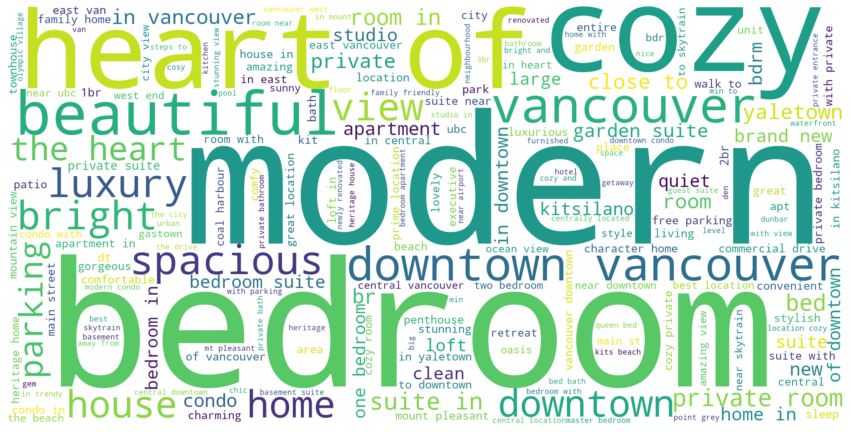

In [15]:
#name column

#Put the column data into a string variable
text = df_listings['name'].str.cat(sep=' ')

#Create and generate a word cloud image
wordcloud = WordCloud(stopwords = STOPWORDS, background_color="white", height = 1000, width = 2000).generate(text)

#Display the generated image
plt.figure(figsize = (15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Most hosts use 'modern', 'cozy', 'spacious', etc as information in the listing name. Also, there is 'bedroom' information that probably shows number of bedroom. We also see 'downtown' and 'vancouver' here, probably because many of listings are located in downtown or near to downtown. 

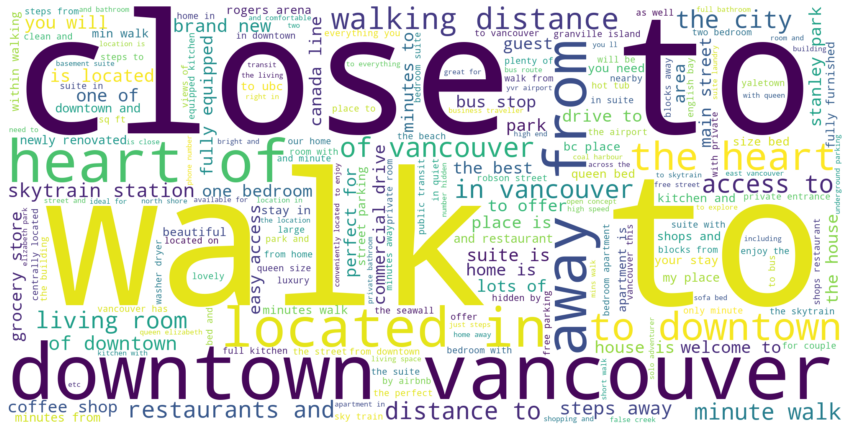

In [16]:
#summary column

#Put the column data into a string variable
text = df_listings['summary'].str.cat(sep=' ')

#Create and generate a word cloud image
wordcloud = WordCloud(stopwords = STOPWORDS, background_color="white", height = 1000, width = 2000).generate(text)

#Display the generated image
plt.figure(figsize = (15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In the summary, many hosts wanted to identify the location, such as 'walk to', 'close to', 'located in', 'walking distance', etc.

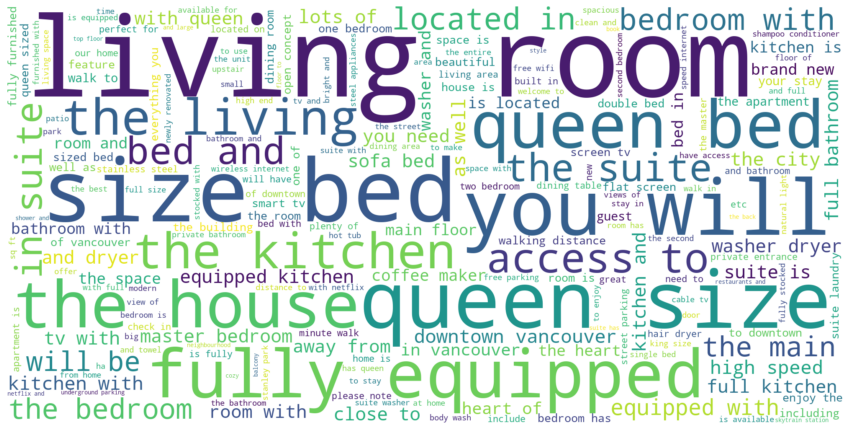

In [17]:
#space column

#Put the column data into a string variable
text = df_listings['space'].str.cat(sep=' ')

#Create and generate a word cloud image
wordcloud = WordCloud(stopwords = STOPWORDS, background_color="white", height = 1000, width = 2000).generate(text)

#Display the generated image
plt.figure(figsize = (15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Here we can see they wanted to inform the size of bed, size of room, fully equipped room, etc. This information quite important too. 

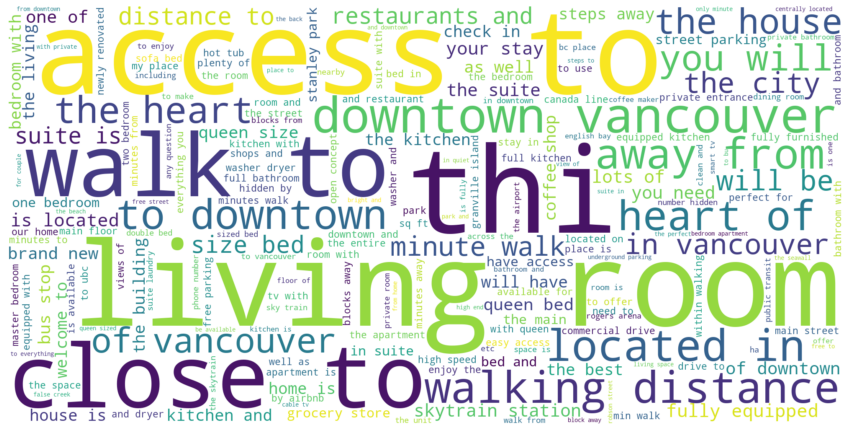

In [18]:
#description column

#Put the column data into a string variable
text = df_listings['description'].str.cat(sep=' ')

#Create and generate a word cloud image
wordcloud = WordCloud(stopwords = STOPWORDS, background_color="white", height = 1000, width = 2000).generate(text)

#Display the generated image
plt.figure(figsize = (15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

It has quite similar information with `summary` column, such as 'close to', 'walk to', 'access to', 'downtown', 'vancouver', etc. Also, it has similar information with `space` column. We can see some words like 'living room', 'fully equipped', 'bedroom' there. Let's take a look again several data points of these columns.

In [19]:
#Set no max colwidth to see all the content of the columns
pd.set_option('display.max_colwidth', None)

df_listings[['summary','space','description']].head(10)

summary  \
0                                                                                                                                                                                                            stunning two bedroom, two bathroom apartment. this spacious, 1200 square foot suite includes a private resident’s elevator to the top of vancouver with gorgeous 180 degree views of the city. it features hardwood floors, flat screen lcd televisions, high-end furnishings, and comfortable bedding.   
1  garden level studio suite with garden patio - in a trendy and very central area of vancouver. located 2 blocks from king edward station on canadaline rapid transit link between yvr - downtown. comfortable, cozy and bright! close to queen elizabeth park and cambie/main street neighborhood. there is a queen bed in the suite (ideal space for a couple) plus a daybed which, when expanded out, sleeps 2 more. fireplace/ bathroom with underfloor heating. kitchenette/appliances for easy self-catering.   
2                                                                                                                                                                                       very spacious and comfortable with very well kitchen equipped . great for small family and business people, closing to many amenities and services, like restaurant and public transportation. fully furniture and extra bedding . family building and very safe, close walking distant to downtown or take bus or skytrain.   
3                     designer furnished one bedroom for rent in thecentre of downtown with city views from every room! one month min/3 month max floor to ceiling windows & overheight ceilings offer tons of light. walk in closet, ac , internet, cable and free laundry room. fully  equipped down to the towels, sheets & dishes. gym, sauna, common bbq patio area in building to enjoy.. steps from robson street for shopping, restaurants & easy transit access. sorry, no pets and no smoking are allowed.   
4                                              this apartment rents for one month blocks of time. this is due to new vancouver city regulations. in the heart of vancouver, this apartment has it all! chef's kitchen, granite counter tops and vanity, real wood cabinets, cotton linens, beautiful  yard, private entrance, across from a willow tree-lined lake and park.  gorgeous community centre with ice rink and gym. transit central. ten minutes to downtown vancouver. ski hills within half hour drive.   
5                         the ecoloft is located in the lovely, family rich cedar cottage neighborhood and is described as 'a perfect place from which to explore the city!'.  guests love the high ceilings, natural light, custom bamboo finishing, teak furniture, sun lit shower, open space, tree lined streets, & convenient location.  the loft is available for rent on a monthly basis until later spring 2018 when we will open it up for shorter term rental as per vancouver's short term rental policy.   
6                                                                                                                                                                                                                                                                                                                                                                               2 bedroom garden level guest suite.(lower level) one bedroom contains a queen bed one bedroom contains a bunkbed sleeps 4 occupants.   
7                                                                                                                                                                                                                                                                                    a newly renovated comfy and cozy family home in a convenient east vancouver neighbourhood…with everything you need for a great vacation. great residential area yet only 20 minutes via 

It looks like most of the `description` column are combination of `summary` and `space` columns, but also it can contain only one of those column. Also, we only see the first 10 rows. There is also a possibility to have different information in the `description` column. Let's see a quick similarity of those columns using SequenceMatcher function from difflib library.

In [20]:
#Import the library
from difflib import SequenceMatcher

#Put the columns into new df
df_desc = df_listings[['summary', 'space', 'description']]

#Combine summary and space into 1 new column
df_desc['summary_space'] = df_desc['summary'] + ' ' + df_desc['space']

#Fill null value with empty string
df_desc = df_desc.fillna(' ')

#Calculate the similarity between summary and description
df_desc['sim_sum_desc'] = df_desc[['summary', 'description']].apply(lambda x: SequenceMatcher(None,x['summary'],x['description']).ratio(), axis=1)
#Calculate the similarity between space and description
df_desc['sim_space_desc'] = df_desc[['space', 'description']].apply(lambda x: SequenceMatcher(None,x['space'],x['description']).ratio(), axis=1)
#Calculate the similarity between summary+space and description
df_desc['sim_summary_space_desc'] = df_desc[['summary_space', 'description']].apply(lambda x: SequenceMatcher(None,x['summary_space'],x['description']).ratio(), axis=1)

#See the data that has all the similarity lesser than 0.6, because description column can be similar to summary only, space only, or combination of both
#I picked 0.6 from the documentation as the threshold for minimum close similarity
#https://docs.python.org/2.4/lib/sequencematcher-examples.html
df_desc[(df_desc['sim_sum_desc'] < 0.6) & 
        (df_desc['sim_space_desc'] < 0.6) & 
        (df_desc['sim_summary_space_desc'] < 0.6) 
        ]

<ipython-input-20-1dd7f23b1b52>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_desc['summary_space'] = df_desc['summary'] + ' ' + df_desc['space']


summary  \
151                                                                                                        quiet, beautiful, neighbourhood is vancouver's best. 8 min walk to all-amenities pt grey village. 7 min bus to ubc, downtown 20 min. 2 min walk  to pacific spirit park trail system and ubc bus.   
159                                                                                                                                                                                                                a fully furnished room available to rent. open to both short term and longer term guests.   
194                                                                                         well located kitsilano home between 4th and broadway, 5 minute walk to the beach. corner with direct sunlight and wooden floors. a south facing deck, and gas stove kitchen. private back patio and front porch.   
204                                           our one bedroom suite is a perfect place for a couple or family to call home for their visit to vancouver. it comfortably sleeps 4 (or 5 with a baby or toddler). located between kerrisdale and oakridge and shaughessy and only 10 minutes from the airport.   
210                                                                 3 bedroom home a block from commercial drive with over 25 ethnic restaurants and shops. 200 m from the skytrain (subway) and buses in a friendly neighbourhood and 5 minutes to downtown vancouver. the home has 3 bdrms and 2.5 bthrms.   
...                                                                                                                                                                                                                                                                                                      ...   
5588                                                                                                                                                                                                                                                                 bright studio in the heart of downtown.   
5659                                                                                                                                                                                                                                  great location with all groceries and all the  hip restaurants near by   
5679                                                                                                                                                                                                                                                                                                           
5699                                                                                                                                                                                                                            one bedroom apartment with two murphy beds in the heart of gastown vancouver   
5732  our house is located in an area known as hastings sunrise. we are only 15 minutes to downtown vancouver, and 30 minutes from vancouver international airport (yvr). it is a perfect place for your business or vacation stays. the house is a newly renovated and well maintained bungalow style home.   

                                                                                                                                                                                                                                                space  \
151                                                                                                                          there's a south-facing, private terra cotta tiled deck right outside your door with two chairs, a table and an umbrella.   
159   this space is quiet and serene, hardwood floors throughout, sliding doors leading out to a beautiful backyard. clean, modern, and close to a

We can see that quite amount of data (429 data points) having more complete description information, in addition to summary or space information. I decided not to exclude one of those columns considering some wordings that might be beneficial for similarity checking between documents. Although, it means that some wording could have higher score when I do the vectorization later on due to duplicate words. 

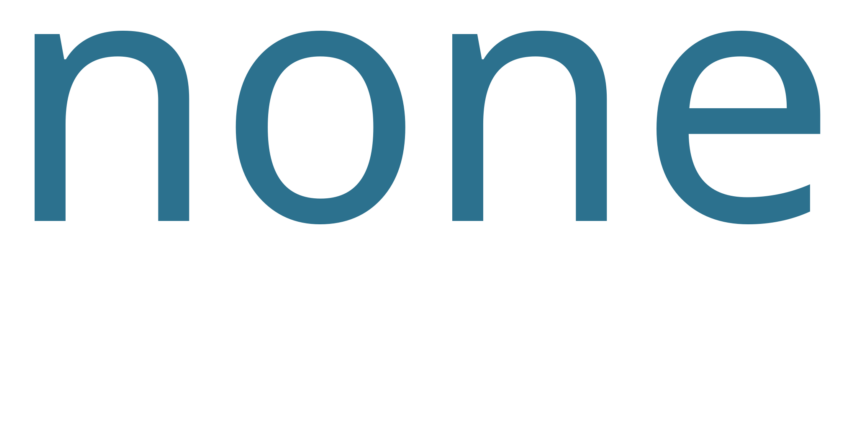

In [21]:
#experiences_offered column

#Put the column data into a string variable
text = df_listings['experiences_offered'].str.cat(sep=' ')

#Create and generate a word cloud image
wordcloud = WordCloud(stopwords = STOPWORDS, background_color="white", height = 1000, width = 2000).generate(text)

#Display the generated image
plt.figure(figsize = (15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Well! It has same value for all listings! We can remove this column.

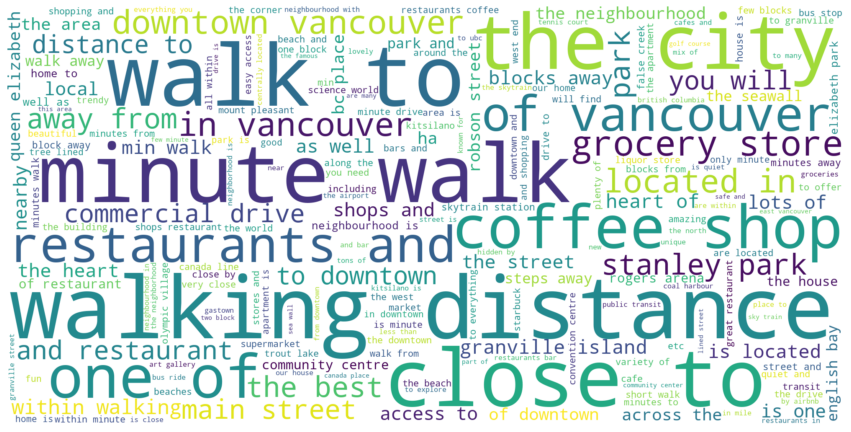

In [22]:
#neighborhood_overview column

#Put the column data into a string variable
text = df_listings['neighborhood_overview'].str.cat(sep=' ')

#Create and generate a word cloud image
wordcloud = WordCloud(stopwords = STOPWORDS, background_color="white", height = 1000, width = 2000).generate(text)

#Display the generated image
plt.figure(figsize = (15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

A little bit similar with `summary` or `description`, but has more information like 'coffee shop', 'stanley park', 'commercial drive' etc. We can use this column because sometimes we want to search a place that near with those information.

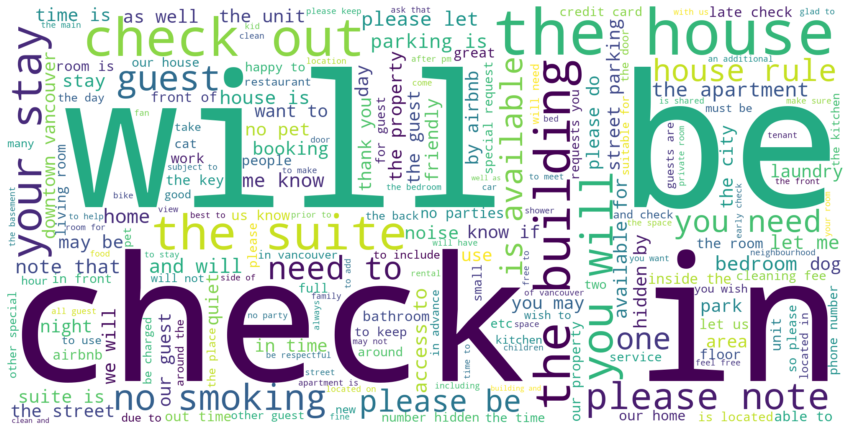

In [23]:
#notes column

#Put the column data into a string variable
text = df_listings['notes'].str.cat(sep=' ')

#Create and generate a word cloud image
wordcloud = WordCloud(stopwords = STOPWORDS, background_color="white", height = 1000, width = 2000).generate(text)

#Display the generated image
plt.figure(figsize = (15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

It seems that this column informs us regarding check in time, house rules, no pet, laundry information, information about parking, no smoking, etc. We can keep this column.

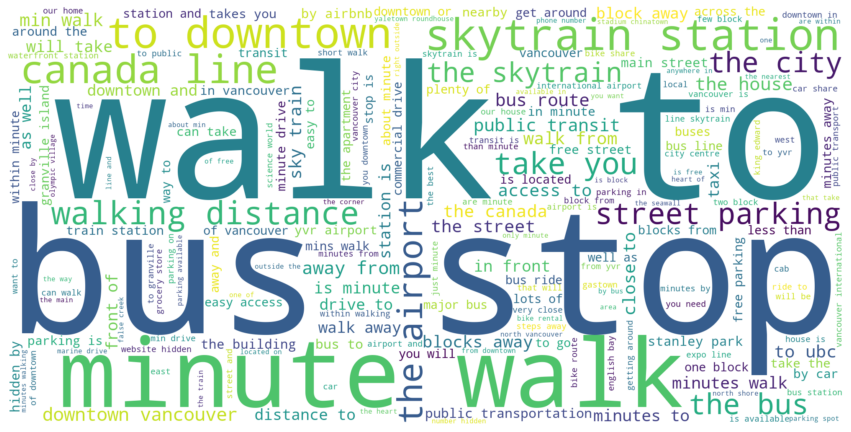

In [24]:
#transit column

#Put the column data into a string variable
text = df_listings['transit'].str.cat(sep=' ')

#Create and generate a word cloud image
wordcloud = WordCloud(stopwords = STOPWORDS, background_color="white", height = 1000, width = 2000).generate(text)

#Display the generated image
plt.figure(figsize = (15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

This column gives us information regarding the transportation availability. This is a useful information.

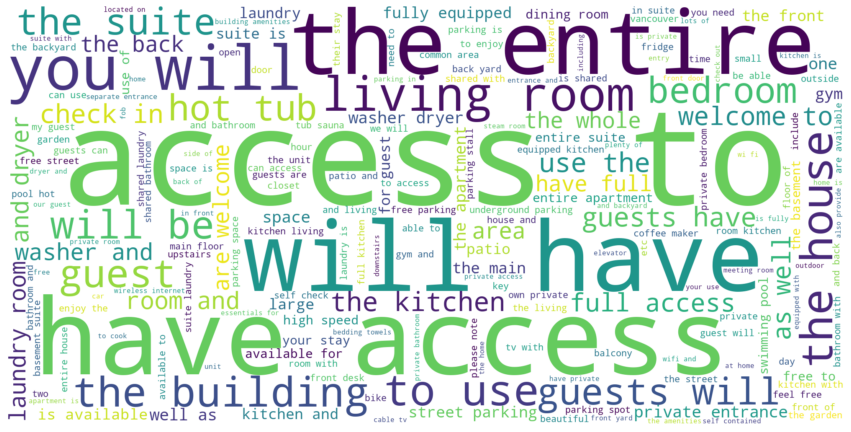

In [25]:
#access column

#Put the column data into a string variable
text = df_listings['access'].str.cat(sep=' ')

#Create and generate a word cloud image
wordcloud = WordCloud(stopwords = STOPWORDS, background_color="white", height = 1000, width = 2000).generate(text)

#Display the generated image
plt.figure(figsize = (15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

We can find information related to the access to some facilities, such as living room, entire house, kitchen, bathroom, etc. We can keep this column.

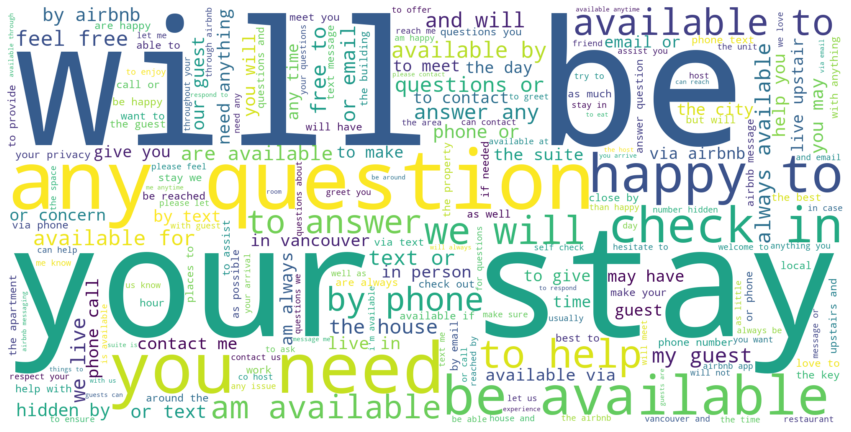

In [26]:
#interaction column

#Put the column data into a string variable
text = df_listings['interaction'].str.cat(sep=' ')

#Create and generate a word cloud image
wordcloud = WordCloud(stopwords = STOPWORDS, background_color="white", height = 1000, width = 2000).generate(text)

#Display the generated image
plt.figure(figsize = (15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

I don't see any important information regarding the listings themselves. This information is more about how to interact between guests and hosts. For me, it is not too important and I will remove this column.

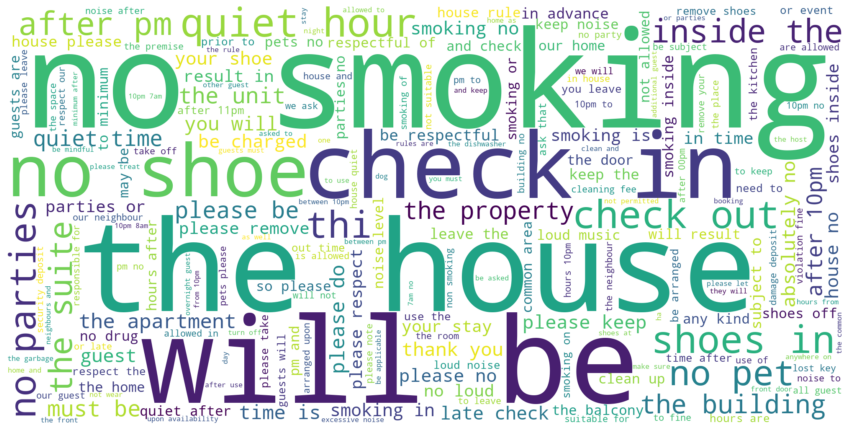

In [27]:
#house_rules column

#Put the column data into a string variable
text = df_listings['house_rules'].str.cat(sep=' ')

#Create and generate a word cloud image
wordcloud = WordCloud(stopwords = STOPWORDS, background_color="white", height = 1000, width = 2000).generate(text)

#Display the generated image
plt.figure(figsize = (15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

I will include this column because sometimes we want to find a place with specific rules, like smoking, pet, parties, etc.

Let's continue with next 30 columns.

In [28]:
#Check columns 31-60
df_listings.iloc[:,31:61].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   host_neighbourhood            5299 non-null   object 
 1   host_listings_count           5806 non-null   int64  
 2   host_total_listings_count     5806 non-null   int64  
 3   host_verifications            5806 non-null   object 
 4   host_has_profile_pic          5806 non-null   object 
 5   host_identity_verified        5806 non-null   object 
 6   street                        5806 non-null   object 
 7   neighbourhood                 5806 non-null   object 
 8   neighbourhood_cleansed        5806 non-null   object 
 9   neighbourhood_group_cleansed  0 non-null      float64
 10  city                          5805 non-null   object 
 11  state                         5801 non-null   object 
 12  zipcode                       5724 non-null   object 
 13  mar

In [29]:
#Check columns 31-60
df_listings.iloc[:,31:61].head()

host_neighbourhood  host_listings_count  host_total_listings_count  \
0              Coal Harbour                   49                         49   
1                Riley Park                    2                          2   
2                 Chinatown                    4                          4   
3        Downtown Vancouver                    0                          0   
4  Kensington-Cedar Cottage                    4                          4   

                                                                                                 host_verifications  \
0                                                           ['email', 'phone', 'reviews', 'jumio', 'government_id']   
1  ['email', 'phone', 'facebook', 'reviews', 'offline_government_id', 'selfie', 'government_id', 'identity_manual']   
2                                  ['email', 'phone', 'reviews', 'jumio', 'offline_government_id', 'government_id']   
3            ['email', 'phone', 'facebook', 'reviews', 'jumio', 'offline_government_id', 'selfie', 'government_id']   
4                                 ['email', 'phone', 'reviews', 'offline_government_id', 'selfie', 'government_id']   

  host_has_profile_pic host_identity_verified                 street  \
0                    t                      t  Vancouver, BC, Canada   
1                    t                      f  Vancouver, BC, Canada   
2                    t                      t  Vancouver, BC, Canada   
3                    f                      f  Vancouver, BC, Canada   
4                    t                      f  Vancouver, BC, Canada   

              neighbourhood    neighbourhood_cleansed  \
0              Coal Harbour                  Downtown   
1                Riley Park                Riley Park   
2        Downtown Vancouver         Downtown Eastside   
3        Downtown Vancouver                  West End   
4  Kensington-Cedar Cottage  Kensington-Cedar Cottage   

   neighbourhood_group_cleansed       city state  zipcode     market  \
0                           NaN  Vancouver    BC  V6E 2P4  Vancouver   
1                           NaN  Vancouver    BC      V5Y  Vancouver   
2                           NaN  Vancouver    BC      V6B  Vancouver   
3                           NaN  Vancouver    BC  V6Z 2S1  Vancouver   
4                           NaN  Vancouver    BC      V5N  Vancouver   

      smart_location country_code country  latitude  longitude  \
0  Vancouver, Canada           CA  Canada  49.28772 -123.12110   
1  Vancouver, Canada           CA  Canada  49.24577 -123.10516   
2  Vancouver, Canada           CA  Canada  49.27955 -123.10546   
3  Vancouver, Canada           CA  Canada  49.28209 -123.12515   
4  Vancouver, Canada           CA  Canada  49.25550 -123.06696   

  is_location_exact property_type        room_type  accommodates  bathrooms  \
0                 t   Condominium  Entire home/apt             5        2.0   
1                 t     Apartment  Entire home/apt             4        1.0   
2                 t     Apartment  Entire home/apt             4        2.0   
3                 t   Condominium  Entire home/apt             2        1.0   
4                 t     Apartment  Entire home/apt             2        1.0   

   bedrooms  beds  bed_type  \
0       2.0   2.0  Real Bed   
1       0.0   2.0  Real Bed   
2       2.0   4.0  Real Bed   
3       1.0   1.0  Real Bed   
4       1.0   0.0  Real Bed   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

- Again, I will exclude the rest of host information.
- Also, since there are many columns represent the location (`street`, `neighbourhood`, `neighbourhood_cleansed`, `neighbourhood_group_cleansed`, `city`, `state`, `zipcode`, `market`, `smart_location`, `country_code`, `country`, `latitude`, `longitude`, `is_location_exact`). I can get more useful information from either `neighbourhood` or `neighbourhood_cleansed`. I chose `neighbourhood_cleansed` instead of `neighbourhood` because it seems it is the correct column (I can see there is Coal Harbour in neighbourhood column, but there is no such data in neighbourhoods csv file).
- I won't include property_type, room_type, accommodates, bathrooms, bedrooms, beds, bed_type, amenities and price information because those information can be filtered from the website directly. Here, our goal is focusing on descriptive information for our recommender system.

In [30]:
#Check columns 61-90
df_listings.iloc[:,61:91].head()

weekly_price monthly_price security_deposit cleaning_fee  guests_included  \
0          NaN     $4,750.00        $1,500.00      $295.00                1   
1      $750.00     $2,500.00            $0.00       $40.00                1   
2    $1,040.00     $3,074.00        $2,096.00      $210.00                3   
3      $750.00           NaN          $300.00       $65.00                1   
4      $800.00     $2,400.00            $0.00       $40.00                1   

  extra_people  minimum_nights  maximum_nights  minimum_minimum_nights  \
0        $0.00              90            1124                      90   
1        $0.00               2             180                       2   
2       $35.00              30              90                      30   
3        $0.00              30              60                      30   
4        $0.00              30              90                      30   

   maximum_minimum_nights  minimum_maximum_nights  maximum_maximum_nights  \
0                      90                    1124                    1124   
1                       2                    1125                    1125   
2                      30                      90                      90   
3                      30                      60                      60   
4                      30                      90                      90   

   minimum_nights_avg_ntm  maximum_nights_avg_ntm calendar_updated  \
0                    90.0                  1124.0     5 months ago   
1                     2.0                  1125.0      2 weeks ago   
2                    30.0                    90.0     6 months ago   
3                    30.0                    60.0      3 weeks ago   
4                    30.0                    90.0      5 weeks ago   

  has_availability  availability_30  availability_60  availability_90  \
0                t               12               42               72   
1                t                4               30               43   
2                t               30               50               60   
3                t               27               46               57   
4                t               12               42               61   

   availability_365 calendar_last_scraped  number_of_reviews  \
0               347            2020-05-14                 16   
1               211            2020-05-15                242   
2               335            2020-05-12                 58   
3                57            2020-05-14                427   
4               326            2020-05-14                 85   

   number_of_reviews_ltm first_review last_review  review_scores_rating  \
0                      0   2011-11-15  2017-02-26                  93.0   
1                     52   2010-02-21  2020-04-30                  97.0   
2                      2   2010-02-26  2020-03-24                  84.0   
3                     10   2010-06-22  2019-08-04                  93.0   
4                      3   2011-06-02  2020-04-18                  98.0   

   review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  \
0                     9.0                        9.0                   10.0   
1                    10.0                       10.0                   10.0   
2                     8.0                        9.0                    8.0   
3                     9.0                       10.0                    9.0   
4                    10.0                       10.0                   10.0   

   review_scores_communication  
0                          9.0  
1                         10.0  
2                          8.0  
3                         10.0  
4                         10.0

I won't include all of those information above, again because I am focusing on the descriptive information. Price, min max nights, availability, number of reviews, and review scores will give bias information to my content recommender system.

In [31]:
#Check columns 91-end
df_listings.iloc[:,91:].head()

review_scores_location  review_scores_value requires_license    license  \
0                    10.0                  9.0                t  18-476608   
1                    10.0                 10.0                t  20-160253   
2                     8.0                  8.0                t        NaN   
3                    10.0                  9.0                t  18-611603   
4                    10.0                 10.0                t        NaN   

                                                          jurisdiction_names  \
0  {"British Columbia"," Canada"," Vancouver"," British Columbia"," Canada"}   
1  {"British Columbia"," Canada"," Vancouver"," British Columbia"," Canada"}   
2  {"British Columbia"," Canada"," Vancouver"," British Columbia"," Canada"}   
3  {"British Columbia"," Canada"," Vancouver"," British Columbia"," Canada"}   
4  {"British Columbia"," Canada"," Vancouver"," British Columbia"," Canada"}   

  instant_bookable is_business_travel_ready          cancellation_policy  \
0                f                        f  strict_14_with_grace_period   
1                t                        f                     moderate   
2                f                        f  strict_14_with_grace_period   
3                f                        f  strict_14_with_grace_period   
4                f                        f                     moderate   

  require_guest_profile_picture require_guest_phone_verification  \
0                             f                                f   
1                             f                                f   
2                             t                                t   
3                             f                                t   
4                             f                                f   

   calculated_host_listings_count  \
0                              49   
1                               1   
2                               3   
3                               1   
4                               1   

   calculated_host_listings_count_entire_homes  \
0                                           49   
1                                            1   
2                                            2   
3                                            1   
4                                            1   

   calculated_host_listings_count_private_rooms  \
0                                             0   
1                                             0   
2                                             1   
3                                             0   
4                                             0   

   calculated_host_listings_count_shared_rooms  reviews_per_month  
0                                            0               0.15  
1                                            0               1.94  
2                                            0               0.47  
3                                            0               3.54  
4                                            0               0.78

Same here, I will exclude the columns.

Since we have identified all the unnecessary columns, let's drop it.

In [32]:
pd.reset_option('display.max_colwidth')

In [33]:
#We have much more columns to be dropped comparing to columns that we want to keep, so I will select the required columns to new dataframe
df_listings_fin = df_listings.loc[:, ['id', 'name', 'summary', 'space', 'description', 'neighborhood_overview', 
                                       'notes', 'transit', 'access', 'house_rules', 'neighbourhood_cleansed']]

df_listings_fin.head()

id                                               name  \
0  10080                     d1 -  million dollar view 2 br   
1  13188                  garden level studio in ideal loc.   
2  13357  ! wow! 2bed 2bath 1bed den harbour view apartm...   
3  13358  monthly (or longer ) designer one bedroom down...   
4  13490                       vancouver's best kept secret   

                                             summary  \
0  stunning two bedroom, two bathroom apartment. ...   
1  garden level studio suite with garden patio - ...   
2  very spacious and comfortable with very well k...   
3  designer furnished one bedroom for rent in the...   
4  this apartment rents for one month blocks of t...   

                                               space  \
0  *please note: bed setup: 2 x queen, plus 2 twi...   
1  very close (3min walk) to nat bailey baseball ...   
2  mountains and harbour view 2 bedroom,2 bath,1 ...   
3  this suites central location puts you within w...   
4  vancouver city central, 700 sq.ft., main floor...   

                                         description  \
0  stunning two bedroom, two bathroom apartment. ...   
1  garden level studio suite with garden patio - ...   
2  very spacious and comfortable with very well k...   
3  this suites central location puts you within w...   
4  this apartment rents for one month blocks of t...   

                               neighborhood_overview  \
0                                                NaN   
1  the uber hip main street area is a short walk ...   
2  amanzing bibrant professional neighbourhood. c...   
3                                                NaN   
4  in the heart of vancouver, this apartment has ...   

                                               notes  \
0                                                NaN   
1  parking is free on the streets to the east and...   
2  some strata bylaws that need to follow and res...   
3  please be aware thsi suite is so central no ca...   
4  this apartment is designed for adult guests on...   

                                             transit  \
0                                                NaN   
1  check out (website hidden by airbnb)  to see t...   
2                                                NaN   
3                                                NaN   
4  this apartment could not be more central. it i...   

                                              access  \
0                                                NaN   
1                                                NaN   
2  the entire apartment . except no included the ...   
3  the entore suite will be yours during your sta...   
4  guests have full access to the beautiful back ...   

                                         house_rules    neighbourhood_cleansed  
0                                                NaN                  Downtown  
1   limited noise after 11:00pm. strictly no smoking                Riley Park  
2  no parties,no smoking,no pets. damages deposit...         Downtown Eastside  
3  no pets and no smoking please  **one time $60 ...                  West End  
4  we offer a home for a single person or a coupl...  Kensington-Cedar Cottage

In [34]:
#Check the final dataset
df_listings_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      5806 non-null   int64 
 1   name                    5805 non-null   object
 2   summary                 5630 non-null   object
 3   space                   4601 non-null   object
 4   description             5685 non-null   object
 5   neighborhood_overview   4313 non-null   object
 6   notes                   2802 non-null   object
 7   transit                 4284 non-null   object
 8   access                  3511 non-null   object
 9   house_rules             4139 non-null   object
 10  neighbourhood_cleansed  5806 non-null   object
dtypes: int64(1), object(10)
memory usage: 499.1+ KB


We have some null values for all the descriptive columns. I will replace it with empty string because I am planning to merge all descriptive columns into a single column, before vectorize it all together. 

In [35]:
#Fill null values in descriptive columns with empty string
df_listings_fin['name'].fillna('', inplace = True)
df_listings_fin['summary'].fillna('', inplace = True)
df_listings_fin['space'].fillna('', inplace = True)
df_listings_fin['description'].fillna('', inplace = True)
df_listings_fin['neighborhood_overview'].fillna('', inplace = True)
df_listings_fin['notes'].fillna('', inplace = True)
df_listings_fin['transit'].fillna('', inplace = True)
df_listings_fin['access'].fillna('', inplace = True)
df_listings_fin['house_rules'].fillna('', inplace = True)

df_listings.fillna('', inplace = True)

In [36]:
df_listings_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      5806 non-null   int64 
 1   name                    5806 non-null   object
 2   summary                 5806 non-null   object
 3   space                   5806 non-null   object
 4   description             5806 non-null   object
 5   neighborhood_overview   5806 non-null   object
 6   notes                   5806 non-null   object
 7   transit                 5806 non-null   object
 8   access                  5806 non-null   object
 9   house_rules             5806 non-null   object
 10  neighbourhood_cleansed  5806 non-null   object
dtypes: int64(1), object(10)
memory usage: 499.1+ KB


Next, combine the columns.

In [37]:
#Combine all descriptive columns into 1 column
df_listings_fin["content"] = df_listings_fin["name"] + " " + \
                             df_listings_fin["summary"] + " " + \
                             df_listings_fin["space"] + " " + \
                             df_listings_fin["description"] + " " + \
                             df_listings_fin["neighborhood_overview"] + " " + \
                             df_listings_fin["notes"] + " " + \
                             df_listings_fin["transit"] + " " + \
                             df_listings_fin["access"] + " " + \
                             df_listings_fin["house_rules"]

In [38]:
df_listings_fin.head()

id                                               name  \
0  10080                     d1 -  million dollar view 2 br   
1  13188                  garden level studio in ideal loc.   
2  13357  ! wow! 2bed 2bath 1bed den harbour view apartm...   
3  13358  monthly (or longer ) designer one bedroom down...   
4  13490                       vancouver's best kept secret   

                                             summary  \
0  stunning two bedroom, two bathroom apartment. ...   
1  garden level studio suite with garden patio - ...   
2  very spacious and comfortable with very well k...   
3  designer furnished one bedroom for rent in the...   
4  this apartment rents for one month blocks of t...   

                                               space  \
0  *please note: bed setup: 2 x queen, plus 2 twi...   
1  very close (3min walk) to nat bailey baseball ...   
2  mountains and harbour view 2 bedroom,2 bath,1 ...   
3  this suites central location puts you within w...   
4  vancouver city central, 700 sq.ft., main floor...   

                                         description  \
0  stunning two bedroom, two bathroom apartment. ...   
1  garden level studio suite with garden patio - ...   
2  very spacious and comfortable with very well k...   
3  this suites central location puts you within w...   
4  this apartment rents for one month blocks of t...   

                               neighborhood_overview  \
0                                                      
1  the uber hip main street area is a short walk ...   
2  amanzing bibrant professional neighbourhood. c...   
3                                                      
4  in the heart of vancouver, this apartment has ...   

                                               notes  \
0                                                      
1  parking is free on the streets to the east and...   
2  some strata bylaws that need to follow and res...   
3  please be aware thsi suite is so central no ca...   
4  this apartment is designed for adult guests on...   

                                             transit  \
0                                                      
1  check out (website hidden by airbnb)  to see t...   
2                                                      
3                                                      
4  this apartment could not be more central. it i...   

                                              access  \
0                                                      
1                                                      
2  the entire apartment . except no included the ...   
3  the entore suite will be yours during your sta...   
4  guests have full access to the beautiful back ...   

                                         house_rules  \
0                                                      
1   limited noise after 11:00pm. strictly no smoking   
2  no parties,no smoking,no pets. damages deposit...   
3  no pets and no smoking please  **one time $60 ...   
4  we offer a home for a single person or a coupl...   

     neighbourhood_cleansed                                            content  
0                  Downtown  d1 -  million dollar view 2 br stunning two be...  
1                Riley Park  garden level studio in ideal loc. garden level...  
2         Downtown Eastside  ! wow! 2bed 2bath 1bed den harbour view apartm...  
3                  West End  monthly (or longer ) designer one bedroom down...  
4  Kensington-Cedar Cottage  vancouver's best kept secret this apartment re...

Now the dataset is ready. We will vectorize `content` column and do one hot encoder for `neighbourhood_cleansed` column.

### Build Recommender System

Convert the `content` using TfidfVectorizer.

In [40]:
#Import the TfidVectorizer package
from sklearn.feature_extraction.text import TfidfVectorizer

#Import and set the stop words
import nltk
stopwords = nltk.corpus.stopwords.words('english')

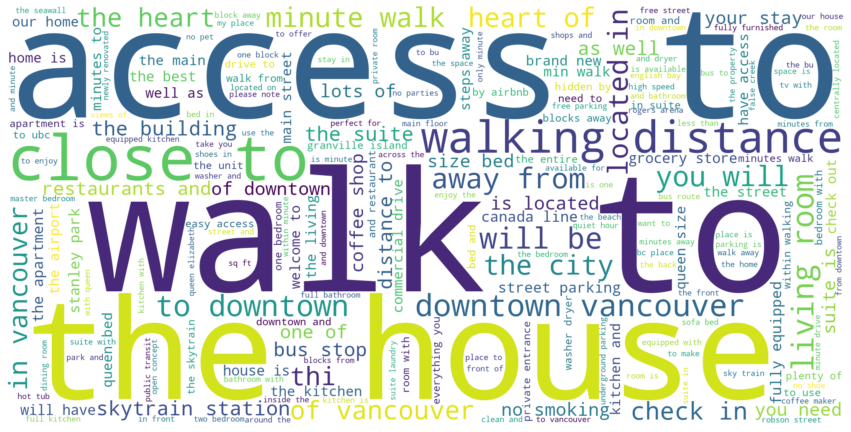

In [41]:
#content column

#Put the column data into a string variable
text = df_listings_fin['content'].str.cat(sep=' ')

#Create and generate a word cloud image
wordcloud = WordCloud(stopwords = STOPWORDS, background_color="white", height = 1000, width = 2000).generate(text)

#Display the generated image
plt.figure(figsize = (15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [42]:
#Transforms words in content columns to TFIDF
vectorizer = TfidfVectorizer(stop_words = stopwords, ngram_range = (1, 2), min_df = 0)

#Fit the vectorizer to the data
vectorizer.fit(df_listings_fin['content'])

#Transform the data
tfidf_content = vectorizer.transform(df_listings_fin['content'])

#Check the shape
tfidf_content.shape

(5806, 337306)

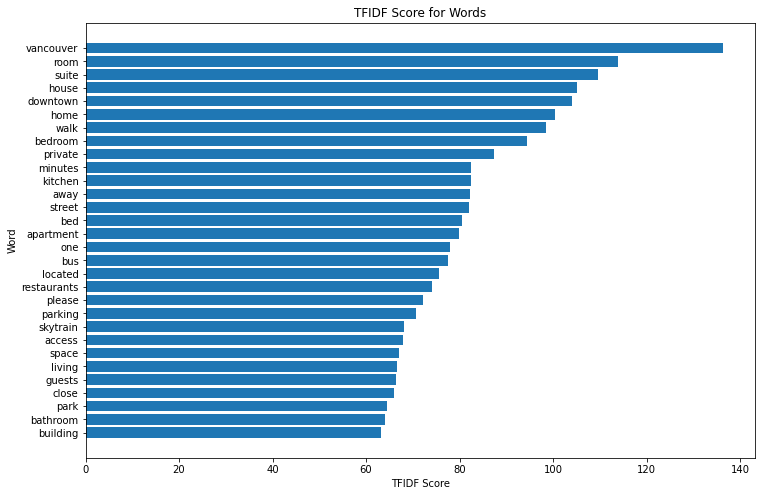

In [43]:
#Check top 10 most used words in the content
word_counts = np.array(np.sum(tfidf_content, axis=0)).reshape((-1,))
words = np.array(vectorizer.get_feature_names())
words_df = pd.DataFrame({"word":words, 
                         "count":word_counts})
sorted_words_df = words_df.sort_values(by="count", ascending=False).head(30)
sorted_words_df = sorted_words_df.sort_values(by="count", ascending=True)

plt.figure(figsize = (12,8))
plt.barh(sorted_words_df['word'], sorted_words_df['count'])
plt.xlabel("TFIDF Score")
plt.ylabel("Word")
plt.title("TFIDF Score for Words")


plt.show()

In [44]:
#Download the data to CSV to be used in Tableau; Generate bubble visualization for slide presentation
sorted_words_df.to_csv('data/words_df.csv')

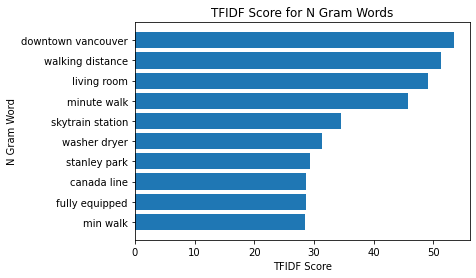

In [45]:
#Check top 10 most used ngram words in the content
# Extract ngram rows
ngram_df = words_df[words_df['word'].str.contains(' ')]

# Sort by the number of times they appear
sorted_ngram_df = ngram_df.sort_values(by='count', ascending=False).head(10)
sorted_ngram_df = sorted_ngram_df.sort_values(by='count', ascending=True)

plt.barh(sorted_ngram_df['word'], sorted_ngram_df['count'])
plt.xlabel("TFIDF Score")
plt.ylabel("N Gram Word")
plt.title("TFIDF Score for N Gram Words")


plt.show()

Here we can see Vancouver as the most word used by listings. Since we know all the listings are located in Vancouver, it is better to remove this word.

In [46]:
#Add custom stop word
stopwords.append('vancouver')

#Transforms words in content columns to TFIDF
vectorizer = TfidfVectorizer(stop_words = stopwords, ngram_range = (1, 2), min_df = 0)

#Fit the vectorizer to the data
vectorizer.fit(df_listings_fin['content'])

#Transform the data
tfidf_content = vectorizer.transform(df_listings_fin['content'])

#Check the shape
tfidf_content.shape

(5806, 337810)

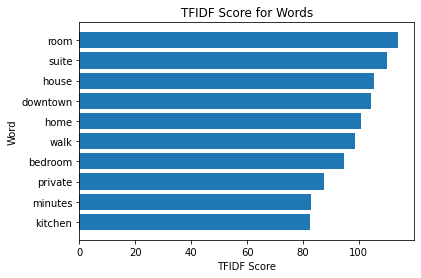

In [48]:
#Check top 10 most used words in the content
word_counts = np.array(np.sum(tfidf_content, axis=0)).reshape((-1,))
words = np.array(vectorizer.get_feature_names())
words_df = pd.DataFrame({"word":words, 
                         "count":word_counts})
sorted_words_df = words_df.sort_values(by="count", ascending=False).head(10)
sorted_words_df = sorted_words_df.sort_values(by="count", ascending=True)

plt.barh(sorted_words_df['word'], sorted_words_df['count'])
plt.xlabel("TFIDF Score")
plt.ylabel("Word")
plt.title("TFIDF Score for Words")


plt.show()

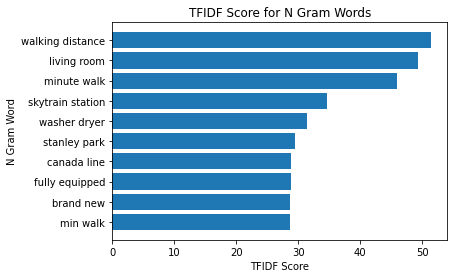

In [49]:
#Check top 10 most used ngram words in the content
# Extract ngram rows
ngram_df = words_df[words_df['word'].str.contains(' ')]

# Sort by the number of times they appear
sorted_ngram_df = ngram_df.sort_values(by='count', ascending=False).head(10)
sorted_ngram_df = sorted_ngram_df.sort_values(by='count', ascending=True)

plt.barh(sorted_ngram_df['word'], sorted_ngram_df['count'])
plt.xlabel("TFIDF Score")
plt.ylabel("N Gram Word")
plt.title("TFIDF Score for N Gram Words")


plt.show()

It looks good now. room, suite, and house are the most words being used to describe their listings. We also see place of interest like Stanley Park, skytrain station, Canada line (which is the skytrain), and some features like fully equipped or brand new. A lot of listings also mentioned walking distance and minute walk to indicate they have a good location or neighborhood. One thing that surprise me is washer dryer. It seems that it is an important feature too for a listing.

<br>

Now let's build a recommender system based on content similarity.

In [50]:
#Set dictionary for index and listing_id
index = 0
keys = {}

for listing in df_listings_fin.itertuples():
    key = listing[1]
    keys[key] = index
    index += 1

In [51]:
#Helper function to look up a listing TFIDF by its id.
def get_listing_by_id(id, tfidf_content, keys):
    row_id = keys[id]
    row = tfidf_content[row_id,:]
    return row

In [52]:
#Test the get_listing_by_id function
get_listing_by_id(10080, tfidf_content, keys)

<1x337810 sparse matrix of type '<class 'numpy.float64'>'
	with 251 stored elements in Compressed Sparse Row format>

In [53]:
#Import the cosine_similarity package
from sklearn.metrics.pairwise import cosine_similarity

In [54]:
#Function to get the result of content recommender
def content_recommender(listing_id, tfidf_content, listings, num) :
    
    #Set dataframe variable for the result
    similar_listings = pd.DataFrame(columns = ["similarity", "id", "listing_url", "name", "summary", "space", "description", 
                                               "neighborhood_overview", "notes", "transit", "access", "house_rules", "price"] )
    
    #Get listing data to compare
    listing_1 = get_listing_by_id(listing_id, tfidf_content, keys)
    
    #Go through ALL the listings
    for index, listing in listings.iterrows():
        #Find the similarity of the two listings
        listing_2 = get_listing_by_id(listing['id'],tfidf_content,keys)
        similarity = cosine_similarity(listing_1,listing_2)
        similar_listings.loc[len(similar_listings)] = [similarity[0][0],
                                                       listing['id'], listing['listing_url'], listing['name'], 
                                                       listing['summary'], listing['space'], listing['description'], 
                                                       listing['neighborhood_overview'], listing['notes'], listing['transit'], 
                                                       listing['access'], listing['house_rules'], listing['price'] 
                                                       ]

    #Return without index 0 because it will be the same listing id with our sample
    return similar_listings.sort_values(by=['similarity'],ascending=False)[1:num+1]


In [55]:
#Test the function
content_recommender(13188, tfidf_content, df_listings, 5)

similarity        id                            listing_url  \
5388    0.454512  42271343  https://www.airbnb.com/rooms/42271343   
3513    0.256244  34513875  https://www.airbnb.com/rooms/34513875   
5079    0.152113  41049121  https://www.airbnb.com/rooms/41049121   
113     0.116065    961006    https://www.airbnb.com/rooms/961006   
21      0.101928     33150     https://www.airbnb.com/rooms/33150   

                                                name  \
5388      studio suite in beautiful central location   
3513                 private comfortable guest house   
5079  spacious private suite at queen elizabeth park   
113   oakridge canada line completely renovated home   
21                   “suite on main”  near  q.e park   

                                                summary  \
5388  clean, modern and new studio. comfortable, coz...   
3513  explore vancouver in a highly transit friendly...   
5079  your quiet and spacious suite includes a bedro...   
113   bright 2 br garden suite in a newly renovated ...   
21                                                        

                                                  space  \
5388  close to nat bailey baseball stadium, hillcres...   
3513  this guest house is a new build and sits on th...   
5079                                                      
113   this private non-smoking suite is excellent fo...   
21    just renovated, sparkling new and clean! **** ...   

                                            description  \
5388  clean, modern and new studio. comfortable, coz...   
3513  explore vancouver in a highly transit friendly...   
5079  your quiet and spacious suite includes a bedro...   
113   bright 2 br garden suite in a newly renovated ...   
21    just renovated, sparkling new and clean! **** ...   

                                  neighborhood_overview notes  \
5388                                                            
3513  10 minute walk to oakridge mall, local grocery...         
5079  we are located across the street from queen el...         
113   walking distance to every where.   -3 houses t...         
21    we live in the funkiest neighborhood in vancou...         

                                                transit  \
5388                                                      
3513  no car needed! only 5 blocks from langara coll...   
5079  we are a 5-minute walk away from the king edwa...   
113   -5 minute walk to canada line sky train statio...   
21                                                        

                                                 access  \
5388                                                      
3513         keypad with private code updated each stay   
5079                                                      
113              walk 5 minutes to famous oakridge mall   
21    our guests are welcome to use the suite and th...   

                                            house_rules    price  
5388  limited noise after 11:00pm. - strictly no smo...   $85.00  
3513                                                     $135.00  
5079                                                      $99.00  
113   additional rules - quiet time 10pm-7am -no par...  $218.00  
21                   quiet time after 10pm. no smoking.  $100.00

Now we have the result of our recommender function! However, it took quite a while to generate the result from this function. I believe it's because we loop and call the cosine_similarity for 5806 times (total rows). Let's try to optimize the function.

In [56]:
#Function to get the result of content recommender without looping the cosine_similarity function
def content_recommender_opt(listing_id, tfidf_content, listings, num) :
    
    #Set dataframe variable for the result
    similar_listings = pd.DataFrame(columns = ["similarity", "id", "listing_url", "name", "summary", "space", "description", 
                                               "neighborhood_overview", "notes", "transit", "access", "house_rules", "price"] )
    
    #Get listing data to compare
    my_listing = get_listing_by_id(listing_id, tfidf_content, keys)
    
    #Cosine similarity between the listing and all listings
    similarity = cosine_similarity(my_listing, tfidf_content)
    
    #Loop num most similar exclude index 0 because it will be the same listing id with our sample
    for index in similarity[0].argsort()[::-1][1:num+1]:
        
        #Append the data into dataframe
        similar_listings.loc[len(similar_listings)] = [similarity[0][index],
                                                       listings.iloc[index].loc['id'], 
                                                       listings.iloc[index].loc['listing_url'], 
                                                       listings.iloc[index].loc['name'], 
                                                       listings.iloc[index].loc['summary'], 
                                                       listings.iloc[index].loc['space'], 
                                                       listings.iloc[index].loc['description'],
                                                       listings.iloc[index].loc['neighborhood_overview'], 
                                                       listings.iloc[index].loc['notes'], 
                                                       listings.iloc[index].loc['transit'], 
                                                       listings.iloc[index].loc['access'], 
                                                       listings.iloc[index].loc['house_rules'], 
                                                       listings.iloc[index].loc['price']]

    return similar_listings


In [57]:
#Set no max colwidth to see all the content of the columns
#pd.set_option('display.max_colwidth', None)

In [58]:
content_recommender_opt(13188, tfidf_content, df_listings,5)

similarity        id                            listing_url  \
0    0.454512  42271343  https://www.airbnb.com/rooms/42271343   
1    0.256244  34513875  https://www.airbnb.com/rooms/34513875   
2    0.152113  41049121  https://www.airbnb.com/rooms/41049121   
3    0.116065    961006    https://www.airbnb.com/rooms/961006   
4    0.101928     33150     https://www.airbnb.com/rooms/33150   

                                             name  \
0      studio suite in beautiful central location   
1                 private comfortable guest house   
2  spacious private suite at queen elizabeth park   
3  oakridge canada line completely renovated home   
4                 “suite on main”  near  q.e park   

                                             summary  \
0  clean, modern and new studio. comfortable, coz...   
1  explore vancouver in a highly transit friendly...   
2  your quiet and spacious suite includes a bedro...   
3  bright 2 br garden suite in a newly renovated ...   
4                                                      

                                               space  \
0  close to nat bailey baseball stadium, hillcres...   
1  this guest house is a new build and sits on th...   
2                                                      
3  this private non-smoking suite is excellent fo...   
4  just renovated, sparkling new and clean! **** ...   

                                         description  \
0  clean, modern and new studio. comfortable, coz...   
1  explore vancouver in a highly transit friendly...   
2  your quiet and spacious suite includes a bedro...   
3  bright 2 br garden suite in a newly renovated ...   
4  just renovated, sparkling new and clean! **** ...   

                               neighborhood_overview notes  \
0                                                            
1  10 minute walk to oakridge mall, local grocery...         
2  we are located across the street from queen el...         
3  walking distance to every where.   -3 houses t...         
4  we live in the funkiest neighborhood in vancou...         

                                             transit  \
0                                                      
1  no car needed! only 5 blocks from langara coll...   
2  we are a 5-minute walk away from the king edwa...   
3  -5 minute walk to canada line sky train statio...   
4                                                      

                                              access  \
0                                                      
1         keypad with private code updated each stay   
2                                                      
3             walk 5 minutes to famous oakridge mall   
4  our guests are welcome to use the suite and th...   

                                         house_rules    price  
0  limited noise after 11:00pm. - strictly no smo...   $85.00  
1                                                     $135.00  
2                                                      $99.00  
3  additional rules - quiet time 10pm-7am -no par...  $218.00  
4                 quiet time after 10pm. no smoking.  $100.00

It is much better! Less than 1 second! This function is useful when we have stayed in 1 listing and would like to stay in another listing that similar with this listing. But, how if I've never stay in any Airbnb at Vancouver? Or what if I have stayed in more than 1 listing and want to get recommendation from all of my staying history?

If we don't have any history, we can get recommendation based on our preferences. In that case, we have to give input on what kind of listing that we want. Here, I will build a function where we can pass a parameter of our preferences.

In [59]:
#Function to get the result of content recommender from user preferences
def content_recommender_user_preferences(user_preferences, tfidf_content, listings, num) :
    
    #Set dataframe variable for the result
    similar_listings = pd.DataFrame(columns = ["similarity", "id", "listing_url", "name", "summary", "space", "description", 
                                               "neighborhood_overview", "notes", "transit", "access", "house_rules", "price"] )
    
    #Get the transform data of user preferences information
    user_pref_transform = vectorizer.transform([user_preferences])
    
    #Cosine similarity between the listing and all listings
    similarity = cosine_similarity(user_pref_transform, tfidf_content)
    
    #Loop num most similar
    for index in similarity[0].argsort()[::-1][:num]:
        
        #Append the data into dataframe
        similar_listings.loc[len(similar_listings)] = [similarity[0][index],
                                                       listings.iloc[index].loc['id'], 
                                                       listings.iloc[index].loc['listing_url'], 
                                                       listings.iloc[index].loc['name'], 
                                                       listings.iloc[index].loc['summary'], 
                                                       listings.iloc[index].loc['space'], 
                                                       listings.iloc[index].loc['description'],
                                                       listings.iloc[index].loc['neighborhood_overview'], 
                                                       listings.iloc[index].loc['notes'], 
                                                       listings.iloc[index].loc['transit'], 
                                                       listings.iloc[index].loc['access'], 
                                                       listings.iloc[index].loc['house_rules'], 
                                                       listings.iloc[index].loc['price']]

    return similar_listings


In [60]:
#Test the function with user query
user_preferences = 'apartment wih view and public transport near coffee shop'
content_recommender_user_preferences(user_preferences, tfidf_content, df_listings,5)

similarity        id                            listing_url  \
0    0.129717  12611121  https://www.airbnb.com/rooms/12611121   
1    0.108486  37176125  https://www.airbnb.com/rooms/37176125   
2    0.107327  36006232  https://www.airbnb.com/rooms/36006232   
3    0.099417  34091763  https://www.airbnb.com/rooms/34091763   
4    0.083541  34399605  https://www.airbnb.com/rooms/34399605   

                                                name  \
0             spacious, funky, 3 bdrm., well located   
1  nice apartment next to the park & public trans...   
2                     very spacious, 3 levels house.   
3  quiet and private room located in central loca...   
4  modern and beautiful 2 bedroom suite with parking   

                                             summary  \
0  our lovely garden suite is conveniently locate...   
1  this newly renovated apartment is in a nice ne...   
2  very specious, 6 bdr house  in one of the best...   
3  cozy and quiet room, located near restaurants,...   
4  this brand new modern suite with private entra...   

                                               space  \
0  our lovely 950 sq. ft. garden suite is conveni...   
1                                                      
2                                  the entire house.   
3                                                      
4  2 bedroom with 2 queen beds and 1 sofa bed in ...   

                                         description  \
0  our lovely garden suite is conveniently locate...   
1  this newly renovated apartment is in a nice ne...   
2  very specious, 6 bdr house  in one of the best...   
3  cozy and quiet room, located near restaurants,...   
4  this brand new modern suite with private entra...   

                               neighborhood_overview notes  \
0  one of the friendliest neighbourhoods on the w...         
1  nice quite neighborhood. close to parks and pu...         
2  very safe and quiet, one of the prestigious ar...         
3                                                            
4  public transport 2 minutes walk . bus directly...         

                                             transit  \
0  direct access to public transit right outside ...   
1                                                      
2       a public transport is a minute away by walk.   
3                                                      
4                                                      

                                              access  \
0  you will have access to our lovely back yard a...   
1                                                      
2                                  the entire place.   
3                                                      
4                                                      

                                         house_rules    price  
0  check in at 4 pm, check out at 11 am. late che...  $139.00  
1                                                     $151.00  
2  1.  the guest are expected to put the dishes i...  $449.00  
3       - quiet hours after 11pm, no shoes on carpet   $49.00  
4                                                     $130.00

Now I can find some options based on my preferences! Now let's build a function to accomodate user with more than 1 listing history.

In [61]:
from scipy.sparse import vstack

In [62]:
#Function to get the result of content recommender for multiple listing id
def content_recommender_multi(listing_ids, tfidf_content, listings, num) :
    
    #Set dataframe variable for the result
    similar_listings = pd.DataFrame(columns = ["similarity", "id", "listing_url", "name", "summary", "space", "description", 
                                               "neighborhood_overview", "notes", "transit", "access", "house_rules", "price"] )
    
    #Set list for exclude the sample listing_ids index for similar_listings
    my_listing_indexes = []
    
    #Set dataframe for all sample listings
    my_listings = pd.DataFrame()
    
    #Get sample listings data and index
    for listing_id in listing_ids:
        my_listings = vstack((my_listings, get_listing_by_id(listing_id, tfidf_content, keys)))
        my_listing_indexes.append(keys[listing_id])
    
    #Set average value of each column of the sample listings
    my_listing = my_listings.mean(axis=0)
    
    #Cosine similarity between the average of sample listings and all listings
    similarity = cosine_similarity(my_listing, tfidf_content)    
    
    #Loop from most similar data
    for index in similarity[0].argsort()[::-1][:]:
        
        #Exclude the same listing with our sample
        if index in my_listing_indexes:
            continue
            
        #Append the data into dataframe
        similar_listings.loc[len(similar_listings)] = [similarity[0][index],
                                                       listings.iloc[index].loc['id'], 
                                                       listings.iloc[index].loc['listing_url'], 
                                                       listings.iloc[index].loc['name'], 
                                                       listings.iloc[index].loc['summary'], 
                                                       listings.iloc[index].loc['space'], 
                                                       listings.iloc[index].loc['description'],
                                                       listings.iloc[index].loc['neighborhood_overview'], 
                                                       listings.iloc[index].loc['notes'], 
                                                       listings.iloc[index].loc['transit'], 
                                                       listings.iloc[index].loc['access'], 
                                                       listings.iloc[index].loc['house_rules'], 
                                                       listings.iloc[index].loc['price']]
        
        #Break from the loop when reach the num
        if len(similar_listings) == num:
            break

    return similar_listings


In [63]:
#Test the function

#Set several listing ids
listing_ids = [13188, 13357, 17765]

content_recommender_multi(listing_ids, tfidf_content, df_listings,5)

similarity        id                            listing_url  \
0    0.279892  42271343  https://www.airbnb.com/rooms/42271343   
1    0.180833  34513875  https://www.airbnb.com/rooms/34513875   
2    0.116286  41049121  https://www.airbnb.com/rooms/41049121   
3    0.113972   1103566   https://www.airbnb.com/rooms/1103566   
4    0.104363   2831468   https://www.airbnb.com/rooms/2831468   

                                              name  \
0       studio suite in beautiful central location   
1                  private comfortable guest house   
2   spacious private suite at queen elizabeth park   
3  modern, heart of downtown-3 br+2bath+office+pkg   
4         modern 1br suite in a fantastic location   

                                             summary  \
0  clean, modern and new studio. comfortable, coz...   
1  explore vancouver in a highly transit friendly...   
2  your quiet and spacious suite includes a bedro...   
3  gorgeous modern apt in heart of busy downtown....   
4  this is a modern superbly clean and comfortabl...   

                                               space  \
0  close to nat bailey baseball stadium, hillcres...   
1  this guest house is a new build and sits on th...   
2                                                      
3  if you are looking to be right in the center o...   
4  the apartment is quiet and private and include...   

                                         description  \
0  clean, modern and new studio. comfortable, coz...   
1  explore vancouver in a highly transit friendly...   
2  your quiet and spacious suite includes a bedro...   
3  gorgeous modern apt in heart of busy downtown....   
4  this is a modern superbly clean and comfortabl...   

                               neighborhood_overview  \
0                                                      
1  10 minute walk to oakridge mall, local grocery...   
2  we are located across the street from queen el...   
3  * 1 block to tinseltown mall & movie theatre *...   
4  we are ideally situated in the heart of dougla...   

                                               notes  \
0                                                      
1                                                      
2                                                      
3                                                      
4  amenities  washer and clothes dryer towels pro...   

                                             transit  \
0                                                      
1  no car needed! only 5 blocks from langara coll...   
2  we are a 5-minute walk away from the king edwa...   
3  * 1 minute walking distance to skytrain statio...   
4  the suite is located 3 minutes walk from the c...   

                                              access  \
0                                                      
1         keypad with private code updated each stay   
2                                                      
3  * living room with one sofa bed big enough for...   
4  private guest access. the unit is close to eve...   

                                         house_rules    price  
0  limited noise after 11:00pm. - strictly no smo...   $85.00  
1                                                     $135.00  
2                                                      $99.00  
3  * no smoking & no pets - if smoking odor or pe...  $349.00  
4                         no smoking, no pets please   $96.00

In [64]:
#Test the function with one listing id

#Set several listing ids
listing_ids = [13188, 13357, 17765]

content_recommender_multi(listing_ids, tfidf_content, df_listings,5)

similarity        id                            listing_url  \
0    0.279892  42271343  https://www.airbnb.com/rooms/42271343   
1    0.180833  34513875  https://www.airbnb.com/rooms/34513875   
2    0.116286  41049121  https://www.airbnb.com/rooms/41049121   
3    0.113972   1103566   https://www.airbnb.com/rooms/1103566   
4    0.104363   2831468   https://www.airbnb.com/rooms/2831468   

                                              name  \
0       studio suite in beautiful central location   
1                  private comfortable guest house   
2   spacious private suite at queen elizabeth park   
3  modern, heart of downtown-3 br+2bath+office+pkg   
4         modern 1br suite in a fantastic location   

                                             summary  \
0  clean, modern and new studio. comfortable, coz...   
1  explore vancouver in a highly transit friendly...   
2  your quiet and spacious suite includes a bedro...   
3  gorgeous modern apt in heart of busy downtown....   
4  this is a modern superbly clean and comfortabl...   

                                               space  \
0  close to nat bailey baseball stadium, hillcres...   
1  this guest house is a new build and sits on th...   
2                                                      
3  if you are looking to be right in the center o...   
4  the apartment is quiet and private and include...   

                                         description  \
0  clean, modern and new studio. comfortable, coz...   
1  explore vancouver in a highly transit friendly...   
2  your quiet and spacious suite includes a bedro...   
3  gorgeous modern apt in heart of busy downtown....   
4  this is a modern superbly clean and comfortabl...   

                               neighborhood_overview  \
0                                                      
1  10 minute walk to oakridge mall, local grocery...   
2  we are located across the street from queen el...   
3  * 1 block to tinseltown mall & movie theatre *...   
4  we are ideally situated in the heart of dougla...   

                                               notes  \
0                                                      
1                                                      
2                                                      
3                                                      
4  amenities  washer and clothes dryer towels pro...   

                                             transit  \
0                                                      
1  no car needed! only 5 blocks from langara coll...   
2  we are a 5-minute walk away from the king edwa...   
3  * 1 minute walking distance to skytrain statio...   
4  the suite is located 3 minutes walk from the c...   

                                              access  \
0                                                      
1         keypad with private code updated each stay   
2                                                      
3  * living room with one sofa bed big enough for...   
4  private guest access. the unit is close to eve...   

                                         house_rules    price  
0  limited noise after 11:00pm. - strictly no smo...   $85.00  
1                                                     $135.00  
2                                                      $99.00  
3  * no smoking & no pets - if smoking odor or pe...  $349.00  
4                         no smoking, no pets please   $96.00

It works for one or multiple listing id! Now we have 2 reccomender function, with user preference information and listing ids parameter. Let's combine the function.

In [65]:
#Function to get the result of content recommender for all scenarios
def content_recommender_fin(tfidf_content, listings, num, listing_ids = None, user_preferences = None) :
    
    """Return num recommendation based on listing_ids or/and user_preferences

    Args:
        tfidf_content : dataframe of vectorized listing content
        listings : dataframe of listing, to get the listing information for the output
        num : total recommendation for the output
        listing_ids : list of listing_ids to be compared to all listings
        user_preferences : string of user query

    Returns:
    A dataframe of listings recommendations with total rows of num
    """
        
    #Set dataframe variable for the result
    similar_listings = pd.DataFrame(columns = ["similarity", "id", "listing_url", "name", "summary", "space", "description", 
                                               "neighborhood_overview", "notes", "transit", "access", "house_rules", "price",
                                               "neighborhood"] )
    
    if user_preferences != None:
        #Get the transform data of user preferences information
        user_pref_transform = vectorizer.transform([user_preferences])
    
    if listing_ids != None:
        #Set list for exclude the sample listing_ids index for similar_listings
        my_listing_indexes = []

        #Set dataframe for all sample listings
        my_listings = pd.DataFrame()

        #Get sample listings data and index
        for listing_id in listing_ids:
            my_listings = vstack((my_listings, get_listing_by_id(listing_id, tfidf_content, keys)))
            my_listing_indexes.append(keys[listing_id])

        #If user pref is exists, add as 1 of sample data
        if user_preferences != None:
            my_listings = vstack((my_listings, user_pref_transform))
            
        #Set average value of each column of the sample listings
        my_listing = my_listings.mean(axis=0)
        
    else:
        #If no listing_ids, set my_listing with user pref only
        my_listing = user_pref_transform
    
    #Cosine similarity between the average of sample listings and all listings
    similarity = cosine_similarity(my_listing, tfidf_content)    
    
    #Loop from most similar data
    for index in similarity[0].argsort()[::-1][:]:
        
        #Exclude the same listing with our sample
        if listing_ids != None:
            if index in my_listing_indexes:
                continue
            
        #Append the data into dataframe
        similar_listings.loc[len(similar_listings)] = [similarity[0][index],
                                                       listings.iloc[index].loc['id'], 
                                                       listings.iloc[index].loc['listing_url'], 
                                                       listings.iloc[index].loc['name'], 
                                                       listings.iloc[index].loc['summary'], 
                                                       listings.iloc[index].loc['space'], 
                                                       listings.iloc[index].loc['description'],
                                                       listings.iloc[index].loc['neighborhood_overview'], 
                                                       listings.iloc[index].loc['notes'], 
                                                       listings.iloc[index].loc['transit'], 
                                                       listings.iloc[index].loc['access'], 
                                                       listings.iloc[index].loc['house_rules'], 
                                                       listings.iloc[index].loc['price'], 
                                                       listings.iloc[index].loc['neighbourhood_cleansed']]
        
        #Break from the loop when reach the num
        if len(similar_listings) == num:
            break

    return similar_listings


In [66]:
#Test with one listing id
listing_ids = [13188]

content_recommender_fin(tfidf_content, df_listings,5, listing_ids = listing_ids)

similarity        id                            listing_url  \
0    0.454512  42271343  https://www.airbnb.com/rooms/42271343   
1    0.256244  34513875  https://www.airbnb.com/rooms/34513875   
2    0.152113  41049121  https://www.airbnb.com/rooms/41049121   
3    0.116065    961006    https://www.airbnb.com/rooms/961006   
4    0.101928     33150     https://www.airbnb.com/rooms/33150   

                                             name  \
0      studio suite in beautiful central location   
1                 private comfortable guest house   
2  spacious private suite at queen elizabeth park   
3  oakridge canada line completely renovated home   
4                 “suite on main”  near  q.e park   

                                             summary  \
0  clean, modern and new studio. comfortable, coz...   
1  explore vancouver in a highly transit friendly...   
2  your quiet and spacious suite includes a bedro...   
3  bright 2 br garden suite in a newly renovated ...   
4                                                      

                                               space  \
0  close to nat bailey baseball stadium, hillcres...   
1  this guest house is a new build and sits on th...   
2                                                      
3  this private non-smoking suite is excellent fo...   
4  just renovated, sparkling new and clean! **** ...   

                                         description  \
0  clean, modern and new studio. comfortable, coz...   
1  explore vancouver in a highly transit friendly...   
2  your quiet and spacious suite includes a bedro...   
3  bright 2 br garden suite in a newly renovated ...   
4  just renovated, sparkling new and clean! **** ...   

                               neighborhood_overview notes  \
0                                                            
1  10 minute walk to oakridge mall, local grocery...         
2  we are located across the street from queen el...         
3  walking distance to every where.   -3 houses t...         
4  we live in the funkiest neighborhood in vancou...         

                                             transit  \
0                                                      
1  no car needed! only 5 blocks from langara coll...   
2  we are a 5-minute walk away from the king edwa...   
3  -5 minute walk to canada line sky train statio...   
4                                                      

                                              access  \
0                                                      
1         keypad with private code updated each stay   
2                                                      
3             walk 5 minutes to famous oakridge mall   
4  our guests are welcome to use the suite and th...   

                                         house_rules    price neighborhood  
0  limited noise after 11:00pm. - strictly no smo...   $85.00   Riley Park  
1                                                     $135.00       Sunset  
2                                                      $99.00   Riley Park  
3  additional rules - quiet time 10pm-7am -no par...  $218.00   Riley Park  
4                 quiet time after 10pm. no smoking.  $100.00   Riley Park

In [67]:
#Test with miltiple listing id
listing_ids = [13188, 13357, 17765]

content_recommender_fin(tfidf_content, df_listings,5, listing_ids = listing_ids)

similarity        id                            listing_url  \
0    0.279892  42271343  https://www.airbnb.com/rooms/42271343   
1    0.180833  34513875  https://www.airbnb.com/rooms/34513875   
2    0.116286  41049121  https://www.airbnb.com/rooms/41049121   
3    0.113972   1103566   https://www.airbnb.com/rooms/1103566   
4    0.104363   2831468   https://www.airbnb.com/rooms/2831468   

                                              name  \
0       studio suite in beautiful central location   
1                  private comfortable guest house   
2   spacious private suite at queen elizabeth park   
3  modern, heart of downtown-3 br+2bath+office+pkg   
4         modern 1br suite in a fantastic location   

                                             summary  \
0  clean, modern and new studio. comfortable, coz...   
1  explore vancouver in a highly transit friendly...   
2  your quiet and spacious suite includes a bedro...   
3  gorgeous modern apt in heart of busy downtown....   
4  this is a modern superbly clean and comfortabl...   

                                               space  \
0  close to nat bailey baseball stadium, hillcres...   
1  this guest house is a new build and sits on th...   
2                                                      
3  if you are looking to be right in the center o...   
4  the apartment is quiet and private and include...   

                                         description  \
0  clean, modern and new studio. comfortable, coz...   
1  explore vancouver in a highly transit friendly...   
2  your quiet and spacious suite includes a bedro...   
3  gorgeous modern apt in heart of busy downtown....   
4  this is a modern superbly clean and comfortabl...   

                               neighborhood_overview  \
0                                                      
1  10 minute walk to oakridge mall, local grocery...   
2  we are located across the street from queen el...   
3  * 1 block to tinseltown mall & movie theatre *...   
4  we are ideally situated in the heart of dougla...   

                                               notes  \
0                                                      
1                                                      
2                                                      
3                                                      
4  amenities  washer and clothes dryer towels pro...   

                                             transit  \
0                                                      
1  no car needed! only 5 blocks from langara coll...   
2  we are a 5-minute walk away from the king edwa...   
3  * 1 minute walking distance to skytrain statio...   
4  the suite is located 3 minutes walk from the c...   

                                              access  \
0                                                      
1         keypad with private code updated each stay   
2                                                      
3  * living room with one sofa bed big enough for...   
4  private guest access. the unit is close to eve...   

                                         house_rules    price  neighborhood  
0  limited noise after 11:00pm. - strictly no smo...   $85.00    Riley Park  
1                                                     $135.00        Sunset  
2                                                      $99.00    Riley Park  
3  * no smoking & no pets - if smoking odor or pe...  $349.00      Downtown  
4                         no smoking, no pets please   $96.00  South Cambie

In [68]:
#Test with user preferences
user_preferences = 'apartment wih view and public transport near coffee shop'

content_recommender_fin(tfidf_content, df_listings,5, user_preferences = user_preferences)

similarity        id                            listing_url  \
0    0.129717  12611121  https://www.airbnb.com/rooms/12611121   
1    0.108486  37176125  https://www.airbnb.com/rooms/37176125   
2    0.107327  36006232  https://www.airbnb.com/rooms/36006232   
3    0.099417  34091763  https://www.airbnb.com/rooms/34091763   
4    0.083541  34399605  https://www.airbnb.com/rooms/34399605   

                                                name  \
0             spacious, funky, 3 bdrm., well located   
1  nice apartment next to the park & public trans...   
2                     very spacious, 3 levels house.   
3  quiet and private room located in central loca...   
4  modern and beautiful 2 bedroom suite with parking   

                                             summary  \
0  our lovely garden suite is conveniently locate...   
1  this newly renovated apartment is in a nice ne...   
2  very specious, 6 bdr house  in one of the best...   
3  cozy and quiet room, located near restaurants,...   
4  this brand new modern suite with private entra...   

                                               space  \
0  our lovely 950 sq. ft. garden suite is conveni...   
1                                                      
2                                  the entire house.   
3                                                      
4  2 bedroom with 2 queen beds and 1 sofa bed in ...   

                                         description  \
0  our lovely garden suite is conveniently locate...   
1  this newly renovated apartment is in a nice ne...   
2  very specious, 6 bdr house  in one of the best...   
3  cozy and quiet room, located near restaurants,...   
4  this brand new modern suite with private entra...   

                               neighborhood_overview notes  \
0  one of the friendliest neighbourhoods on the w...         
1  nice quite neighborhood. close to parks and pu...         
2  very safe and quiet, one of the prestigious ar...         
3                                                            
4  public transport 2 minutes walk . bus directly...         

                                             transit  \
0  direct access to public transit right outside ...   
1                                                      
2       a public transport is a minute away by walk.   
3                                                      
4                                                      

                                              access  \
0  you will have access to our lovely back yard a...   
1                                                      
2                                  the entire place.   
3                                                      
4                                                      

                                         house_rules    price  \
0  check in at 4 pm, check out at 11 am. late che...  $139.00   
1                                                     $151.00   
2  1.  the guest are expected to put the dishes i...  $449.00   
3       - quiet hours after 11pm, no shoes on carpet   $49.00   
4                                                     $130.00   

          neighborhood  
0              Marpole  
1       Mount Pleasant  
2           Kerrisdale  
3            Killarney  
4  Victoria-Fraserview

In [69]:
#Test with multiple listing ids plus user preferences
listing_ids = [13188, 13357, 17765]
user_preferences = 'apartment wih view and public transport near coffee shop'

content_recommender_fin(tfidf_content, df_listings,5, listing_ids = listing_ids, user_preferences = user_preferences)

similarity        id                            listing_url  \
0    0.244792  42271343  https://www.airbnb.com/rooms/42271343   
1    0.156138  34513875  https://www.airbnb.com/rooms/34513875   
2    0.106261   1103566   https://www.airbnb.com/rooms/1103566   
3    0.105530  12611121  https://www.airbnb.com/rooms/12611121   
4    0.103368  41049121  https://www.airbnb.com/rooms/41049121   

                                              name  \
0       studio suite in beautiful central location   
1                  private comfortable guest house   
2  modern, heart of downtown-3 br+2bath+office+pkg   
3           spacious, funky, 3 bdrm., well located   
4   spacious private suite at queen elizabeth park   

                                             summary  \
0  clean, modern and new studio. comfortable, coz...   
1  explore vancouver in a highly transit friendly...   
2  gorgeous modern apt in heart of busy downtown....   
3  our lovely garden suite is conveniently locate...   
4  your quiet and spacious suite includes a bedro...   

                                               space  \
0  close to nat bailey baseball stadium, hillcres...   
1  this guest house is a new build and sits on th...   
2  if you are looking to be right in the center o...   
3  our lovely 950 sq. ft. garden suite is conveni...   
4                                                      

                                         description  \
0  clean, modern and new studio. comfortable, coz...   
1  explore vancouver in a highly transit friendly...   
2  gorgeous modern apt in heart of busy downtown....   
3  our lovely garden suite is conveniently locate...   
4  your quiet and spacious suite includes a bedro...   

                               neighborhood_overview notes  \
0                                                            
1  10 minute walk to oakridge mall, local grocery...         
2  * 1 block to tinseltown mall & movie theatre *...         
3  one of the friendliest neighbourhoods on the w...         
4  we are located across the street from queen el...         

                                             transit  \
0                                                      
1  no car needed! only 5 blocks from langara coll...   
2  * 1 minute walking distance to skytrain statio...   
3  direct access to public transit right outside ...   
4  we are a 5-minute walk away from the king edwa...   

                                              access  \
0                                                      
1         keypad with private code updated each stay   
2  * living room with one sofa bed big enough for...   
3  you will have access to our lovely back yard a...   
4                                                      

                                         house_rules    price neighborhood  
0  limited noise after 11:00pm. - strictly no smo...   $85.00   Riley Park  
1                                                     $135.00       Sunset  
2  * no smoking & no pets - if smoking odor or pe...  $349.00     Downtown  
3  check in at 4 pm, check out at 11 am. late che...  $139.00      Marpole  
4                                                      $99.00   Riley Park

Now we have a function that can be used for multiple scenarios. We can pass user preferences argument, one or multiple listing ids argument, or both arguments.

So far, we only consider content to check the similarity. We also still have neighborhood feature. Let's add this into consideration.

Convert `neighbourhood_cleansed` using pandas get_dummies.

In [70]:
#Get new dataframe for neighbourhood_cleansed using pandas get_dummies
df_neighborhood = pd.get_dummies(df_listings_fin.neighbourhood_cleansed)

In [71]:
#Set the column name to identify neighborhood
df_neighborhood = df_neighborhood.add_prefix('neighborhood_')

In [72]:
#Check the data
df_neighborhood.head()

neighborhood_Arbutus Ridge  neighborhood_Downtown  \
0                           0                      1   
1                           0                      0   
2                           0                      0   
3                           0                      0   
4                           0                      0   

   neighborhood_Downtown Eastside  neighborhood_Dunbar Southlands  \
0                               0                               0   
1                               0                               0   
2                               1                               0   
3                               0                               0   
4                               0                               0   

   neighborhood_Fairview  neighborhood_Grandview-Woodland  \
0                      0                                0   
1                      0                                0   
2                      0                                0   
3                      0                                0   
4                      0                                0   

   neighborhood_Hastings-Sunrise  neighborhood_Kensington-Cedar Cottage  \
0                              0                                      0   
1                              0                                      0   
2                              0                                      0   
3                              0                                      0   
4                              0                                      1   

   neighborhood_Kerrisdale  neighborhood_Killarney  neighborhood_Kitsilano  \
0                        0                       0                       0   
1                        0                       0                       0   
2                        0                       0                       0   
3                        0                       0                       0   
4                        0                       0                       0   

   neighborhood_Marpole  neighborhood_Mount Pleasant  neighborhood_Oakridge  \
0                     0                            0                      0   
1                     0                            0                      0   
2                     0                            0                      0   
3                     0                            0                      0   
4                     0                            0                      0   

   neighborhood_Renfrew-Collingwood  neighborhood_Riley Park  \
0                                 0                        0   
1                                 0                        1   
2                                 0                        0   
3                                 0                        0   
4                                 0                        0   

   neighborhood_Shaughnessy  neighborhood_South Cambie  \
0                         0                          0   
1                         0                          0   
2                         0                          0   
3                         0                          0   
4                         0                          0   

   neighborhood_Strathcona  neighborhood_Sunset  \
0                        0                    0   
1                        0                    0   
2                        0                    0   
3                        0                    0   
4                        0                    0   

   neighborhood_Victoria-Fraserview  neighborhood_West End  \
0                                 0                      0   
1                                 0                      0   
2                                 0                      0   
3                                 0                      1   
4                                 0                      0   

   neighborhood_West Point Grey  
0                             0  
1      

In [73]:
from scipy import sparse

In [74]:
#Convert into sparse matrix
sparse.csr_matrix(df_neighborhood)

<5806x23 sparse matrix of type '<class 'numpy.uint8'>'
	with 5806 stored elements in Compressed Sparse Row format>

Combine both sparce table.

In [75]:
from scipy.sparse import hstack

In [76]:
#Combine both sparce matrix
tfidf_all = hstack((tfidf_content, df_neighborhood))

In [77]:
#Check
tfidf_all

<5806x337833 sparse matrix of type '<class 'numpy.float64'>'
	with 1743984 stored elements in COOrdinate format>

In [78]:
#Convert into sparse matrix
tfidf_all = sparse.csr_matrix(tfidf_all)

In [79]:
#Test with one listing id
listing_ids = [13188]

content_recommender_fin(tfidf_all, df_listings,10, listing_ids = listing_ids)

similarity        id                            listing_url  \
0    0.727256  42271343  https://www.airbnb.com/rooms/42271343   
1    0.576056  41049121  https://www.airbnb.com/rooms/41049121   
2    0.558033    961006    https://www.airbnb.com/rooms/961006   
3    0.550964     33150     https://www.airbnb.com/rooms/33150   
4    0.549532  13837849  https://www.airbnb.com/rooms/13837849   
5    0.549405  16218564  https://www.airbnb.com/rooms/16218564   
6    0.548099  34258439  https://www.airbnb.com/rooms/34258439   
7    0.547078   2046259   https://www.airbnb.com/rooms/2046259   
8    0.547072  31555667  https://www.airbnb.com/rooms/31555667   
9    0.545938  33658482  https://www.airbnb.com/rooms/33658482   

                                                name  \
0         studio suite in beautiful central location   
1     spacious private suite at queen elizabeth park   
2     oakridge canada line completely renovated home   
3                    “suite on main”  near  q.e park   
4       main st to ubc, 10 min to downtown, 3 br apt   
5  2 bdrm newly renovated suite oakridge canada line   
6   cozy two bedroom garden suite with private patio   
7  2 bdrm in completly renovated home by canada line   
8                 cambie village modern laneway home   
9         2 bedroom suite near queen elizabeth park.   

                                             summary  \
0  clean, modern and new studio. comfortable, coz...   
1  your quiet and spacious suite includes a bedro...   
2  bright 2 br garden suite in a newly renovated ...   
3                                                      
4  direct bus to ubc is outside.  skytrain to dow...   
5  bright 2 br garden suite in a newly renovated ...   
6  charming two bedroom garden suite with a priva...   
7  this private,non-smoking suite is excellent fo...   
8  welcome to our two bedroom, one full bathroom ...   
9  5 min walk to queen elizabeth park and natbail...   

                                               space  \
0  close to nat bailey baseball stadium, hillcres...   
1                                                      
2  this private non-smoking suite is excellent fo...   
3  just renovated, sparkling new and clean! **** ...   
4  your own suite with 3-bedrooms.  there are no ...   
5  most suitable for 4 or less people. can accoma...   
6  our house is located on a quiet inner resident...   
7  this private non-smoking suite is excellent fo...   
8  stunning vaulted ceilings with large windows b...   
9                                                      

                                         description  \
0  clean, modern and new studio. comfortable, coz...   
1  your quiet and spacious suite includes a bedro...   
2  bright 2 br garden suite in a newly renovated ...   
3  just renovated, sparkling new and clean! **** ...   
4  direct bus to ubc is outside.  skytrain to dow...   
5  bright 2 br garden suite in a newly renovated ...   
6  charming two bedroom garden suite with a priva...   
7  this private,non-smoking suite is excellent fo...   
8  welcome to our two bedroom, one full bathroom ...   
9  5 min walk to queen elizabeth park and natbail...   

                               neighborhood_overview  \
0                                                      
1  we are located across the street from queen el...   
2  walking distance to every where.   -3 houses t...   
3  we live in the funkiest neighborhood in vancou...   
4  hipster main street and king edward avenue.  e...   
5  this brand new private non-smoking suite is ex...   
6  we are a 10 minute walk to main st. and all th...   
7  walking distance to every where.   -3 houses t...   
8  the best little urban community in vancouver w...   
9                                                      

                                               notes  \
0                                                      
1                                                      
2                      

We got better similarity scores. But, all results are in the same location/neighborhood. It seems this is not a good feature to add because it adds bias. What if I want to find a place with certain condition, but not limited to one neighborhood. As a reminder, our main goal for the content recommender system is to suggest listings from their descriptive information. It means our final tfidf data shouldn't include neighborhood feature. 

As a conclusion, I will use the previous function (content_recommender_fin) as my content based recommender system.

In [80]:
#Here I will import all the files needed for my streamlit apps (demo purpose)

import joblib

#Sparse data of my vectorized content
joblib.dump(tfidf_content, "tfidf_content.pkl")

#My listings dataframe for viewing purpose
joblib.dump(df_listings, "df_listings.pkl")

#Vectorizer to be used for user query
joblib.dump(vectorizer, "vectorizer.pkl")

#My keys of my listings to be matched with the tfidf_content
joblib.dump(keys, "keys.pkl")

#Dataframe of listing and user to get the previous listings of the user
df_user = df_reviews[['listing_id', 'reviewer_id']]
joblib.dump(df_user, "df_user.pkl")

['df_user.pkl']

---
##### (Continue to 2_collaborative.ipynb)
---